# FINAL ASSIGNMENT - CRIMINALITA' E SICUREZZA ITALIA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import scipy.stats as stats
import statsmodels.api as sm
from sklearn import metrics
import unidecode

## DATA CLEANING

In [2]:
# IMPORTO DATASET CRIMINALITA E SICUREZZA

criminalita_e_sicurezza = pd.read_excel('../Dati/Criminalit… e sicurezza/NI2025-Criminalit…_e_sicurezza.xlsx')
criminalita_e_sicurezza

,Settore,Indicatore,Modalità,Unità di misura,Territorio,Fonte,2004,2005,2006,2007,...,2016,2017,2018,2019,2020,2021,2022,2023,2024,Note
0,Criminalità e sicurezza,Detenuti,Totale,valori assoluti,Piemonte,Ministero della giustizia - Dipartimento dell'...,4793.0,4727,2738,3919.000000,...,3843,4192,4478,4531,4175,4027,4060,4231,4450,Dati al 31 dicembre dell'anno considerato. Nel...
1,Criminalità e sicurezza,Detenuti,Totale,valori assoluti,Valle d'Aosta/Vallée d'Aoste,Ministero della giustizia - Dipartimento dell'...,169,280,126,142.000000,...,145,196,221,228,172,138,102,132,141,Dati al 31 dicembre dell'anno considerato. Nel...
2,Criminalità e sicurezza,Detenuti,Totale,valori assoluti,Liguria,Ministero della giustizia - Dipartimento dell'...,1413,1460,833,1218.000000,...,1365,1418,1474,1511,1352,1307,1347,1360,1334,Dati al 31 dicembre dell'anno considerato. Nel...
3,Criminalità e sicurezza,Detenuti,Totale,valori assoluti,Lombardia,Ministero della giustizia - Dipartimento dell'...,8043,8653,6453,7385.000000,...,7814,8429,8494,8547,7602,7838,8147,8722,8840,Dati al 31 dicembre dell'anno considerato. Nel...
4,Criminalità e sicurezza,Detenuti,Totale,valori assoluti,Trentino-Alto Adige/Südtirol,Ministero della giustizia - Dipartimento dell'...,368,422,226,242.000000,...,426,403,400,445,388,416,449,483,476,Dati al 31 dicembre dell'anno considerato. Nel...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
527,Criminalità e sicurezza,Vittime di omicidio femmine,Totale,percentuale sul totale delle vittime di entram...,Nord-est,Ministero dell’Interno – Dipartimento della Pu...,....,....,....,50.746269,...,50.769231,46.153846,54.545455,55.319149,52.941176,60.344828,54.901961,41.666667,....,I dati sugli omicidi volontari consumati prove...
528,Criminalità e sicurezza,Vittime di omicidio femmine,Totale,percentuale sul totale delle vittime di entram...,Centro,Ministero dell’Interno – Dipartimento della Pu...,....,....,....,30.769231,...,36.507937,33.333333,35.294118,41.818182,35.849057,46,50,37.142857,....,I dati sugli omicidi volontari consumati prove...
529,Criminalità e sicurezza,Vittime di omicidio femmine,Totale,percentuale sul totale delle vittime di entram...,Centro-Nord,Ministero dell’Interno – Dipartimento della Pu...,....,....,....,37.262357,...,45.959596,39.459459,45.783133,43.820225,48.192771,51.149425,49.142857,38.461538,....,I dati sugli omicidi volontari consumati prove...
530,Criminalità e sicurezza,Vittime di omicidio femmine,Totale,percentuale sul totale delle vittime di entram...,Mezzogiorno,Ministero dell’Interno – Dipartimento della Pu...,....,....,....,13.736264,...,22.439024,22.702703,26.785714,25.517241,28.92562,26.865672,26.751592,32.352941,....,I dati sugli omicidi volontari consumati prove...


In [3]:
# ELIMINO TERRITORI BOLZANO/TRENTO

criminalita_e_sicurezza = criminalita_e_sicurezza[(~criminalita_e_sicurezza['Territorio'].isin(['Bolzano/Bozen', 'Trento']))]
criminalita_e_sicurezza.reset_index(drop=True, inplace=True)

In [4]:
# IMPORTO DATASET POPOLAZIONE ITALIANA 2002-2024 X COMUNE

popolazione_italiana = pd.read_csv('../Progetto Immobiliare/Dati/CSV Clean/Popolazione_Comuni_Italia_2002_2024.csv', sep=';')
popolazione_italiana.head()

,codice_comune,nome_comune,popolazione_maschi,popolazione_femmine,popolazione_totale,anno,nome_provincia,codice_provincia,abbr_provincia,nome_regione,codice_regione
0,1001,Agliè,1219,1338,2557,2002,Torino,1.0,TO,Piemonte,1.0
1,1001,Agliè,1200,1338,2538,2003,Torino,1.0,TO,Piemonte,1.0
2,1001,Agliè,1211,1377,2588,2004,Torino,1.0,TO,Piemonte,1.0
3,1001,Agliè,1267,1412,2679,2005,Torino,1.0,TO,Piemonte,1.0
4,1001,Agliè,1271,1403,2674,2006,Torino,1.0,TO,Piemonte,1.0


In [5]:
# RAGGRUPPO PER REGIONE, ANNO E PORTO AD ANNO PRECEDENTE ED ESPORTO DATASET

popolazione_italiana = popolazione_italiana.groupby(['nome_regione', 'anno'])['popolazione_totale'].sum().reset_index()
popolazione_italiana['anno'] = popolazione_italiana['anno'] - 1
popolazione_italiana
#popolazione_italiana.to_csv('../Dati/CSV_Python/popolazione_italiana.csv')

,nome_regione,anno,popolazione_totale
0,Abruzzo,2001,1262022
1,Abruzzo,2002,1267463
2,Abruzzo,2003,1278509
3,Abruzzo,2004,1286963
4,Abruzzo,2005,1292779
...,...,...,...
455,Veneto,2019,4879133
456,Veneto,2020,4869830
457,Veneto,2021,4847745
458,Veneto,2022,4849553


In [6]:
# IMPORTO DATASET POPOLAZIONE STRANIERA IN ITALIA

popolazione_straniera = pd.read_excel('../Dati/Stranieri/NI2025-Stranieri.xlsx')
popolazione_straniera

,Settore,Indicatore,Modalità,Unità di misura,Territorio,Fonte,2004,2005,2006,2007,...,2016,2017,2018,2019,2020,2021,2022,2023,2024,Note
0,Stranieri,Cittadini non comunitari,Totale,percentuale di ingressi sul totale dei present...,Piemonte,Elaborazioni Istat su dati Ministero dell’interno,....,....,....,....,...,6.260677,7.868931,6.475003,4.546972,3.012644,7.837475,12.564290,9.543860,....,
1,Stranieri,Cittadini non comunitari,Totale,percentuale di ingressi sul totale dei present...,Valle d'Aosta/Vallée d'Aoste,Elaborazioni Istat su dati Ministero dell’interno,....,....,....,....,...,10.492148,8.757375,9.446873,6.732711,3.543093,12.286689,17.658564,11.540193,....,
2,Stranieri,Cittadini non comunitari,Totale,percentuale di ingressi sul totale dei present...,Liguria,Elaborazioni Istat su dati Ministero dell’interno,....,....,....,....,...,5.440557,6.262244,5.829962,4.120911,2.856062,7.633463,14.316237,10.167513,....,
3,Stranieri,Cittadini non comunitari,Totale,percentuale di ingressi sul totale dei present...,Lombardia,Elaborazioni Istat su dati Ministero dell’interno,....,....,....,....,...,4.51206,5.601746,6.045497,4.759181,2.921383,5.990758,10.117224,7.691532,....,
4,Stranieri,Cittadini non comunitari,Totale,percentuale di ingressi sul totale dei present...,Trentino-Alto Adige/Südtirol,Elaborazioni Istat su dati Ministero dell’interno,....,....,....,....,...,5.53092,6.370316,7.402610,5.486135,3.500050,7.110470,14.264849,9.378835,....,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
409,Stranieri,Tasso di occupazione della popolazione straniera,Totale,valori percentuali,Nord-est,"Istat, Rilevazione sulle forze di lavoro",....,....,....,....,...,....,....,65.731892,66.996025,64.189706,66.507122,68.787255,68.706901,70.026697,
410,Stranieri,Tasso di occupazione della popolazione straniera,Totale,valori percentuali,Centro,"Istat, Rilevazione sulle forze di lavoro",....,....,....,....,...,....,....,65.438024,65.148473,61.707032,61.752700,64.656896,65.602666,68.003472,
411,Stranieri,Tasso di occupazione della popolazione straniera,Totale,valori percentuali,Centro-Nord,"Istat, Rilevazione sulle forze di lavoro",....,....,....,....,...,....,....,65.707042,66.208280,62.004089,63.674657,66.616760,67.615874,68.884615,
412,Stranieri,Tasso di occupazione della popolazione straniera,Totale,valori percentuali,Mezzogiorno,"Istat, Rilevazione sulle forze di lavoro",....,....,....,....,...,....,....,58.256685,55.886020,50.519992,51.039426,52.568268,52.630281,53.712707,


In [7]:
# SISTEMO COLONNE (PORTO ANNO PRECEDENTE)

popolazione_straniera.columns = ['Settore', 'Indicatore', 'Modalità', 'Unità di misura', 'Territorio', 'Fonte', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023', 'Note']

In [8]:
# FILTRO IL DATASET PER STRANIERI RESIDENTI TOTALI E FEMMINE

popolazione_straniera = popolazione_straniera[popolazione_straniera['Indicatore'].isin(['Stranieri residenti', 'Stranieri residenti - Femmine'])]
popolazione_straniera

,Settore,Indicatore,Modalità,Unità di misura,Territorio,Fonte,2003,2004,2005,2006,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,Note
276,Stranieri,Stranieri residenti,Totale,per 100 residenti,Piemonte,"Istat, Movimento e calcolo annuale della popol...",4.102891,4.765146,5.25173,5.65,...,9.442761,9.329623,9.372399,9.496981,9.554982,9.761038,9.658393,9.884858,10.08803,I dati degli anni precedenti il 2012 sono stat...
277,Stranieri,Stranieri residenti,Totale,per 100 residenti,Valle d'Aosta/Vallée d'Aoste,"Istat, Movimento e calcolo annuale della popol...",3.157151,3.683255,4.2313,4.667191,...,6.571676,6.37448,6.317891,6.433591,6.501432,6.765306,6.558042,6.807439,6.972826,I dati degli anni precedenti il 2012 sono stat...
278,Stranieri,Stranieri residenti,Totale,per 100 residenti,Liguria,"Istat, Movimento e calcolo annuale della popol...",3.241317,3.966119,4.361313,4.725667,...,8.46931,8.586039,8.742940,8.989419,9.149175,9.869114,9.638378,9.985235,10.313556,I dati degli anni precedenti il 2012 sono stat...
279,Stranieri,Stranieri residenti,Totale,per 100 residenti,Lombardia,"Istat, Movimento e calcolo annuale della popol...",4.89148,6.016558,6.624826,7.123152,...,11.188753,11.014372,11.074189,11.293636,11.459021,11.930898,11.620160,11.789384,12.016895,I dati degli anni precedenti il 2012 sono stat...
280,Stranieri,Stranieri residenti,Totale,per 100 residenti,Trentino-Alto Adige/Südtirol,"Istat, Movimento e calcolo annuale della popol...",4.356772,5.022806,5.641073,6.139227,...,8.857813,8.594066,8.681735,8.887894,9.010184,9.819066,9.071568,9.122930,9.503077,I dati degli anni precedenti il 2012 sono stat...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,Stranieri,Stranieri residenti - Femmine,Totale,valori percentuali,Nord-est,"Istat, Movimento e calcolo annuale della popol...",48.34193,48.205103,48.789125,49.360961,...,53.48429,53.513661,53.097670,52.489288,52.451662,51.570264,51.556227,51.633479,51.078086,I dati degli anni precedenti il 2012 sono stat...
356,Stranieri,Stranieri residenti - Femmine,Totale,valori percentuali,Centro,"Istat, Movimento e calcolo annuale della popol...",53.470321,52.747944,52.87602,53.005127,...,53.649466,53.378863,52.968529,52.689210,52.689006,52.155198,51.595276,51.721601,51.296461,I dati degli anni precedenti il 2012 sono stat...
357,Stranieri,Stranieri residenti - Femmine,Totale,valori percentuali,Centro-Nord,"Istat, Movimento e calcolo annuale della popol...",50.17206,49.730481,50.140025,50.559367,...,53.014076,52.87751,52.521561,52.128981,52.121079,51.500234,51.258466,51.352979,50.840178,I dati degli anni precedenti il 2012 sono stat...
358,Stranieri,Stranieri residenti - Femmine,Totale,valori percentuali,Mezzogiorno,"Istat, Movimento e calcolo annuale della popol...",51.933665,52.812702,53.682669,54.413375,...,52.065872,51.171109,50.149071,49.470059,49.921842,49.534737,49.278975,49.425420,48.582866,I dati degli anni precedenti il 2012 sono stat...


In [9]:
# ELIMINO DATI PER 100 RESIDENTI

popolazione_straniera = popolazione_straniera[popolazione_straniera['Unità di misura'] != 'per 100 residenti']

In [10]:
# ELIMINO TERRITORI BOLZANO/TRENTO

popolazione_straniera = popolazione_straniera[(~popolazione_straniera['Territorio'].isin(['Bolzano/Bozen', 'Trento']))]
popolazione_straniera.reset_index(drop=True, inplace=True)

In [11]:
# ELIMINO TERRITORI RAGGRUPPATI E FILTRO SOLO STRANIERI RESIDENTI TOTALI

popolazione_straniera = popolazione_straniera[(~popolazione_straniera['Territorio'].isin(['Italia', 'Nord-ovest', 'Nord-est', 'Centro', 'Centro-Nord', 'Mezzogiorno'])) & (popolazione_straniera['Indicatore'] == 'Stranieri residenti')]
popolazione_straniera.reset_index(drop=True, inplace=True)

In [12]:
# UNPIVOT STRANIERI RESIDENTI

# 1. Colonna da mantenere come variabile identificativa
id_vars = ['Territorio']

# 2. Colonne da unpivotare 
colonne_anni = [str(anno) for anno in range(2003, 2024)]

# 3. Applica la funzione melt()
popolazione_straniera = popolazione_straniera.melt(
    id_vars=id_vars,
    value_vars=colonne_anni,
    var_name='anno',         
    value_name='Stranieri residenti'    
)

# 4. Converto i tipi di dato
popolazione_straniera.loc[:, 'anno'] = popolazione_straniera['anno'].astype(int)
popolazione_straniera.loc[:, 'Stranieri residenti'] = popolazione_straniera['Stranieri residenti'].astype(int)
popolazione_straniera

,Territorio,anno,Stranieri residenti
0,Piemonte,2003,174810
1,Valle d'Aosta/Vallée d'Aoste,2003,3842
2,Liguria,2003,50983
3,Lombardia,2003,448720
4,Trentino-Alto Adige/Südtirol,2003,41758
...,...,...,...
415,Puglia,2023,147269
416,Basilicata,2023,25410
417,Calabria,2023,99907
418,Sicilia,2023,196919


In [13]:
# ESPORTO DATASET STRANIERI

#popolazione_straniera.to_csv('../Dati/CSV_Python/popolazione_straniera.csv')

### CREAZIONE DI DATASET CON SHAPE IDEALE PER IL NOSTRO STUDIO

In [14]:
# CREO NUOVO DATAFRAME PER STUDIO PARTENDO DA IL DATASET ORIGINALE CRIMINTALITA E SICUREZZA

df_studio = criminalita_e_sicurezza[(~criminalita_e_sicurezza['Indicatore'].isin([#'Omicidi volontari consumati di donne', 
                                        "Persone denunciate per le quali è iniziata l'azione penale", 
                                        "Persone denunciate per le quali è stata disposta l'archiviazione", 
                                        "Persone di 18 anni e più denunciate per le quali è iniziata l'azione penale", 
                                        'Tentati omicidi denunciati dalle Forze di polizia all\'Autorità giudiziaria']))]
df_studio

,Settore,Indicatore,Modalità,Unità di misura,Territorio,Fonte,2004,2005,2006,2007,...,2016,2017,2018,2019,2020,2021,2022,2023,2024,Note
0,Criminalità e sicurezza,Detenuti,Totale,valori assoluti,Piemonte,Ministero della giustizia - Dipartimento dell'...,4793.0,4727,2738,3919.000000,...,3843,4192,4478,4531,4175,4027,4060,4231,4450,Dati al 31 dicembre dell'anno considerato. Nel...
1,Criminalità e sicurezza,Detenuti,Totale,valori assoluti,Valle d'Aosta/Vallée d'Aoste,Ministero della giustizia - Dipartimento dell'...,169,280,126,142.000000,...,145,196,221,228,172,138,102,132,141,Dati al 31 dicembre dell'anno considerato. Nel...
2,Criminalità e sicurezza,Detenuti,Totale,valori assoluti,Liguria,Ministero della giustizia - Dipartimento dell'...,1413,1460,833,1218.000000,...,1365,1418,1474,1511,1352,1307,1347,1360,1334,Dati al 31 dicembre dell'anno considerato. Nel...
3,Criminalità e sicurezza,Detenuti,Totale,valori assoluti,Lombardia,Ministero della giustizia - Dipartimento dell'...,8043,8653,6453,7385.000000,...,7814,8429,8494,8547,7602,7838,8147,8722,8840,Dati al 31 dicembre dell'anno considerato. Nel...
4,Criminalità e sicurezza,Detenuti,Totale,valori assoluti,Trentino-Alto Adige/Südtirol,Ministero della giustizia - Dipartimento dell'...,368,422,226,242.000000,...,426,403,400,445,388,416,449,483,476,Dati al 31 dicembre dell'anno considerato. Nel...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
489,Criminalità e sicurezza,Vittime di omicidio femmine,Totale,percentuale sul totale delle vittime di entram...,Nord-est,Ministero dell’Interno – Dipartimento della Pu...,....,....,....,50.746269,...,50.769231,46.153846,54.545455,55.319149,52.941176,60.344828,54.901961,41.666667,....,I dati sugli omicidi volontari consumati prove...
490,Criminalità e sicurezza,Vittime di omicidio femmine,Totale,percentuale sul totale delle vittime di entram...,Centro,Ministero dell’Interno – Dipartimento della Pu...,....,....,....,30.769231,...,36.507937,33.333333,35.294118,41.818182,35.849057,46,50,37.142857,....,I dati sugli omicidi volontari consumati prove...
491,Criminalità e sicurezza,Vittime di omicidio femmine,Totale,percentuale sul totale delle vittime di entram...,Centro-Nord,Ministero dell’Interno – Dipartimento della Pu...,....,....,....,37.262357,...,45.959596,39.459459,45.783133,43.820225,48.192771,51.149425,49.142857,38.461538,....,I dati sugli omicidi volontari consumati prove...
492,Criminalità e sicurezza,Vittime di omicidio femmine,Totale,percentuale sul totale delle vittime di entram...,Mezzogiorno,Ministero dell’Interno – Dipartimento della Pu...,....,....,....,13.736264,...,22.439024,22.702703,26.785714,25.517241,28.92562,26.865672,26.751592,32.352941,....,I dati sugli omicidi volontari consumati prove...


In [15]:
# ELIMINO DATI DEI DETENUTI PER 100.000 ABITANTI

maschera_da_escludere = (df_studio['Indicatore'] == 'Detenuti') & (df_studio['Unità di misura'] == 'valori per 100.000 abitanti')

df_studio = df_studio[~maschera_da_escludere]

df_studio.info()

<class 'pandas.core.frame.DataFrame'>
Index: 364 entries, 0 to 493
Data columns (total 28 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Settore          364 non-null    object 
 1   Indicatore       364 non-null    object 
 2   Modalità         364 non-null    object 
 3   Unità di misura  364 non-null    object 
 4   Territorio       364 non-null    object 
 5   Fonte            364 non-null    object 
 6   2004             364 non-null    object 
 7   2005             364 non-null    object 
 8   2006             364 non-null    object 
 9   2007             364 non-null    float64
 10  2008             364 non-null    object 
 11  2009             364 non-null    float64
 12  2010             364 non-null    object 
 13  2011             364 non-null    float64
 14  2012             364 non-null    float64
 15  2013             364 non-null    object 
 16  2014             364 non-null    object 
 17  2015             364 

In [16]:
# FILTRO TERRITORI INTERESSATI

unpivot_df = df_studio[(~df_studio['Territorio'].isin(['Italia', 'Nord-ovest', 'Nord-est', 'Centro', 'Centro-Nord', 'Mezzogiorno']))]
unpivot_df

,Settore,Indicatore,Modalità,Unità di misura,Territorio,Fonte,2004,2005,2006,2007,...,2016,2017,2018,2019,2020,2021,2022,2023,2024,Note
0,Criminalità e sicurezza,Detenuti,Totale,valori assoluti,Piemonte,Ministero della giustizia - Dipartimento dell'...,4793.0,4727,2738,3919.000000,...,3843,4192,4478,4531,4175,4027,4060,4231,4450,Dati al 31 dicembre dell'anno considerato. Nel...
1,Criminalità e sicurezza,Detenuti,Totale,valori assoluti,Valle d'Aosta/Vallée d'Aoste,Ministero della giustizia - Dipartimento dell'...,169,280,126,142.000000,...,145,196,221,228,172,138,102,132,141,Dati al 31 dicembre dell'anno considerato. Nel...
2,Criminalità e sicurezza,Detenuti,Totale,valori assoluti,Liguria,Ministero della giustizia - Dipartimento dell'...,1413,1460,833,1218.000000,...,1365,1418,1474,1511,1352,1307,1347,1360,1334,Dati al 31 dicembre dell'anno considerato. Nel...
3,Criminalità e sicurezza,Detenuti,Totale,valori assoluti,Lombardia,Ministero della giustizia - Dipartimento dell'...,8043,8653,6453,7385.000000,...,7814,8429,8494,8547,7602,7838,8147,8722,8840,Dati al 31 dicembre dell'anno considerato. Nel...
4,Criminalità e sicurezza,Detenuti,Totale,valori assoluti,Trentino-Alto Adige/Südtirol,Ministero della giustizia - Dipartimento dell'...,368,422,226,242.000000,...,426,403,400,445,388,416,449,483,476,Dati al 31 dicembre dell'anno considerato. Nel...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
483,Criminalità e sicurezza,Vittime di omicidio femmine,Totale,percentuale sul totale delle vittime di entram...,Puglia,Ministero dell’Interno – Dipartimento della Pu...,....,....,....,21.428571,...,23.076923,22.916667,6.25,25.925926,22.727273,34.615385,14.814815,31.034483,....,I dati sugli omicidi volontari consumati prove...
484,Criminalità e sicurezza,Vittime di omicidio femmine,Totale,percentuale sul totale delle vittime di entram...,Basilicata,Ministero dell’Interno – Dipartimento della Pu...,....,....,....,0.000000,...,0,0,50,0,0,0,0,0,....,I dati sugli omicidi volontari consumati prove...
485,Criminalità e sicurezza,Vittime di omicidio femmine,Totale,percentuale sul totale delle vittime di entram...,Calabria,Ministero dell’Interno – Dipartimento della Pu...,....,....,....,13.559322,...,33.333333,5,28.571429,10.344828,28.571429,20,37.5,25,....,I dati sugli omicidi volontari consumati prove...
486,Criminalità e sicurezza,Vittime di omicidio femmine,Totale,percentuale sul totale delle vittime di entram...,Sicilia,Ministero dell’Interno – Dipartimento della Pu...,....,....,....,13.888889,...,23.076923,25,24.242424,34.375,33.333333,43.75,35,50,....,I dati sugli omicidi volontari consumati prove...


In [17]:
# UNPIVOT DEL DATAFRAME PER STUDIO E CONVERSIONE TIPI DI DATO

# 1. Colonna da mantenere come variabile identificativa
id_vars = ['Territorio', 'Indicatore', 'Unità di misura']

# 2. Colonne da unpivotare 
colonne_anni = [str(anno) for anno in range(2005, 2025)]

# 3. Applica la funzione melt()
unpivot_df = unpivot_df.melt(
    id_vars=id_vars,
    value_vars=colonne_anni,
    var_name='anno',         
    value_name='Valore' 
)

# 4. Converto i tipi di dato
unpivot_df.loc[:, 'anno'] = unpivot_df['anno'].astype(int)
unpivot_df.loc[:, 'Valore'] = unpivot_df['Valore'].astype('string')
unpivot_df

,Territorio,Indicatore,Unità di misura,anno,Valore
0,Piemonte,Detenuti,valori assoluti,2005,4727
1,Valle d'Aosta/Vallée d'Aoste,Detenuti,valori assoluti,2005,280
2,Liguria,Detenuti,valori assoluti,2005,1460
3,Lombardia,Detenuti,valori assoluti,2005,8653
4,Trentino-Alto Adige/Südtirol,Detenuti,valori assoluti,2005,422
...,...,...,...,...,...
5595,Puglia,Vittime di omicidio femmine,percentuale sul totale delle vittime di entram...,2024,....
5596,Basilicata,Vittime di omicidio femmine,percentuale sul totale delle vittime di entram...,2024,....
5597,Calabria,Vittime di omicidio femmine,percentuale sul totale delle vittime di entram...,2024,....
5598,Sicilia,Vittime di omicidio femmine,percentuale sul totale delle vittime di entram...,2024,....


In [18]:
# SOSTITUISCO CAMPI VUOTI CON VALORI NULLI

unpivot_df['Valore'] = unpivot_df['Valore'].replace('....', np.nan)
unpivot_df['Valore'] = pd.to_numeric(unpivot_df['Valore'], errors='coerce')
unpivot_df

,Territorio,Indicatore,Unità di misura,anno,Valore
0,Piemonte,Detenuti,valori assoluti,2005,4727.0
1,Valle d'Aosta/Vallée d'Aoste,Detenuti,valori assoluti,2005,280.0
2,Liguria,Detenuti,valori assoluti,2005,1460.0
3,Lombardia,Detenuti,valori assoluti,2005,8653.0
4,Trentino-Alto Adige/Südtirol,Detenuti,valori assoluti,2005,422.0
...,...,...,...,...,...
5595,Puglia,Vittime di omicidio femmine,percentuale sul totale delle vittime di entram...,2024,NaN
5596,Basilicata,Vittime di omicidio femmine,percentuale sul totale delle vittime di entram...,2024,NaN
5597,Calabria,Vittime di omicidio femmine,percentuale sul totale delle vittime di entram...,2024,NaN
5598,Sicilia,Vittime di omicidio femmine,percentuale sul totale delle vittime di entram...,2024,NaN


In [19]:
# UNISCO IL DATAFRAME DI STUDIO CON POPOLAZIONE ITALIANA

unpivot_df = unpivot_df.merge(popolazione_italiana, left_on=['Territorio', 'anno'], right_on=['nome_regione', 'anno'], how='left')
unpivot_df = unpivot_df.drop(columns=['nome_regione'])
unpivot_df

,Territorio,Indicatore,Unità di misura,anno,Valore,popolazione_totale
0,Piemonte,Detenuti,valori assoluti,2005,4727.0,4295420.0
1,Valle d'Aosta/Vallée d'Aoste,Detenuti,valori assoluti,2005,280.0,123807.0
2,Liguria,Detenuti,valori assoluti,2005,1460.0,1580442.0
3,Lombardia,Detenuti,valori assoluti,2005,8653.0,9369197.0
4,Trentino-Alto Adige/Südtirol,Detenuti,valori assoluti,2005,422.0,970810.0
...,...,...,...,...,...,...
5595,Puglia,Vittime di omicidio femmine,percentuale sul totale delle vittime di entram...,2024,NaN,NaN
5596,Basilicata,Vittime di omicidio femmine,percentuale sul totale delle vittime di entram...,2024,NaN,NaN
5597,Calabria,Vittime di omicidio femmine,percentuale sul totale delle vittime di entram...,2024,NaN,NaN
5598,Sicilia,Vittime di omicidio femmine,percentuale sul totale delle vittime di entram...,2024,NaN,NaN


#### DATASET ESPORTATO PER LAVORAZIONE PARALLELA IN POWER BI NEL QUALE SI E' PREFERITO, AI FINI DELLO STORYTELLING, TRASFORMARE I DATI IN VALORI ASSOLUTI
#### SUCCESSIVAMENTE E' STATO REIMPORTATO IN PYTHON E SOVRASCRITTO AL PRECEDENTE PER ALLINEARE I DATI.

In [20]:
# ESPORTO IL DATAFRAME DI STUDIO PER LAVORO PARALLELO IN POWER BI

#unpivot_df.to_csv('../Dati/CSV_Python/unpivot_df.csv')

In [21]:
# IMPORTO IL DATAFRAME DI STUDIO CON TUTTI I VALORI ASSOLUTI (LAVORO PARALLELO IN POWER BI)

df_val_ass = pd.read_csv('../Dati/CSV_Python/df_con_valori_assoluti.csv', sep=';')
df_val_ass.head()

,Column1,Territorio,Indicatore,anno,popolazione_totale,valori assoluti,per 100 detenuti,valori per 100.000 abitanti,numero di detenuti presenti per 100 posti letto regolamentari,percentuale sul totale delle vittime di entrambi i sessi,Value 100k,Value 100 detenuti,Value 100 vittime,Value assoluto
0,1281,Valle d'Aosta/Vallée d'Aoste,Vittime di omicidio femmine,2009,126489,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1801,Valle d'Aosta/Vallée d'Aoste,Vittime di omicidio femmine,2011,127124,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,240,Piemonte,Vittime di omicidio femmine,2005,4283730,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,241,Valle d'Aosta/Vallée d'Aoste,Vittime di omicidio femmine,2005,122776,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,242,Liguria,Vittime di omicidio femmine,2005,1580164,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
# MANTENGO SOLO LE COLONNE DI INTERESSE

colonne_da_eliminare = [
    'Column1', 
    'valori assoluti', 
    'per 100 detenuti', 
    'valori per 100.000 abitanti', 
    'numero di detenuti presenti per 100 posti letto regolamentari',
    'percentuale sul totale delle vittime di entrambi i sessi',
    'Value 100k', 
    'Value 100 detenuti', 
    'Value 100 vittime'
]
df_val_ass = df_val_ass.drop(columns=colonne_da_eliminare)
df_val_ass.sort_values(by=['Indicatore', 'anno']).reset_index(drop=True)

,Territorio,Indicatore,anno,popolazione_totale,Value assoluto
0,Piemonte,Detenuti,2005,4283730,"4792,999999999999"
1,Valle d'Aosta/Vallée d'Aoste,Detenuti,2005,122776,169
2,Marche,Detenuti,2005,1488773,992
3,Lazio,Detenuti,2005,5240101,"5699,999999999999"
4,Abruzzo,Detenuti,2005,1286963,"1619,9999999999998"
...,...,...,...,...,...
4795,Puglia,Vittime di omicidio femmine,2024,3890661,"8,452125620689655"
4796,Basilicata,Vittime di omicidio femmine,2024,533233,0
4797,Calabria,Vittime di omicidio femmine,2024,1838568,"3,217494"
4798,Sicilia,Vittime di omicidio femmine,2024,4797359,"14,392076999999999"


In [23]:
# SOSTITUISCO LA VIRGOLA CON IL PUNTO E RENDO LE COLONNE NUMERICHE

df_val_ass['Value assoluto'] = df_val_ass['Value assoluto'].str.replace(',', '.').astype(float)

In [24]:
# PIVOT DEL DATAFRAME CON VALORI ASSOLUTI PER INDICATORE

valore_colonna = 'Value assoluto'
df_val_ass = df_val_ass.pivot_table(
    index=['Territorio', 'anno', 'popolazione_totale'],
    columns='Indicatore',
    values = valore_colonna
)

df_val_ass.columns.name = None

df_val_ass = df_val_ass.reset_index()

df_val_ass

,Territorio,anno,popolazione_totale,Detenuti,Detenuti maschi,Detenuti stranieri,Furti con strappo denunciati,Furti denunciati,Furti in abitazione denunciati,Omicidi volontari consumati,Rapine denunciate,Rapine in banca denunciate,Vittime di omicidio maschi,Vittime di omicidio femmine
0,Abruzzo,2005,1286963,1620.0,1576.0,392.0,266.840874,23030.574343,2363.447737,5.015806,468.476271,57.180187,NaN,NaN
1,Abruzzo,2006,1292779,1893.0,1865.0,587.0,300.628102,23230.535501,1886.942384,10.020937,417.873061,58.121433,NaN,NaN
2,Abruzzo,2007,1296630,1062.0,1043.0,209.0,452.591993,23828.167389,2624.432774,6.007858,482.631285,53.069415,NaN,NaN
3,Abruzzo,2008,1311048,1359.0,1313.0,350.0,336.787916,25163.586690,2875.264001,9.048034,536.849992,77.410954,7.037359,2.010674
4,Abruzzo,2009,1321618,1678.0,1626.0,440.0,230.877132,23093.736130,2067.856056,3.011441,472.796215,71.270767,3.011441,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,Veneto,2020,4879133,2672.0,2546.0,1454.0,488.726695,79838.352940,15287.450979,17.989940,1114.376820,8.994970,7.995529,9.994411
396,Veneto,2021,4869830,2282.0,2148.0,1218.0,350.665056,53402.991235,11323.184470,15.984732,1027.019026,3.996183,7.992366,7.992366
397,Veneto,2022,4847745,2283.0,2178.0,1174.0,456.959110,60077.152464,15432.846088,18.956819,1199.268231,3.990909,4.739205,14.217614
398,Veneto,2023,4849553,2487.0,2364.0,1267.0,791.147477,71161.265095,14287.663348,23.004288,1570.292717,4.000746,9.410845,13.593443


In [25]:
# PIVOT DEL DATAFRAME SENZA VALORI ASSOLUTI PER INDICATORE (X UNIRE COLONNE CHE NON POTEVANO ESSERE CONVERTITE IN VALORI ASSOLUTI)

valore_colonna = 'Valore'
unpivot_df = unpivot_df.pivot_table(
    index=['Territorio', 'anno', 'popolazione_totale'],
    columns='Indicatore',
    values=valore_colonna
)

unpivot_df.columns.name = None

unpivot_df = unpivot_df.reset_index()

unpivot_df

,Territorio,anno,popolazione_totale,Detenuti,Detenuti maschi,Detenuti stranieri,Furti con strappo denunciati,Furti denunciati,Furti in abitazione denunciati,Indice di affollamento,Omicidi volontari consumati,Omicidi volontari consumati di donne,Rapine denunciate,Rapine in banca denunciate,Rischio di criminalità percepito dalle famiglie,Vittime di omicidio maschi,Vittime di omicidio femmine
0,Abruzzo,2005,1292779.0,1893.0,98.520866,31.008980,23.254408,1796.945611,145.960167,122.762646,0.775147,NaN,32.323627,4.495852,13.1,NaN,NaN
1,Abruzzo,2006,1296630.0,1062.0,98.210923,19.679849,34.905254,1837.699836,202.404138,70.894526,0.463344,NaN,37.221974,4.092873,17.0,NaN,NaN
2,Abruzzo,2007,1311048.0,1359.0,96.615158,25.754231,25.688450,1919.349001,219.310353,91.700405,0.690137,0.298153,40.948157,5.904510,23.8,77.777778,22.222222
3,Abruzzo,2008,1321618.0,1678.0,96.901073,26.221692,17.469279,1747.383596,156.463975,113.762712,0.227860,0.000000,35.774045,5.392690,28.6,100.000000,0.000000
4,Abruzzo,2009,1325731.0,1965.0,97.201018,22.748092,16.163740,1664.789709,157.785296,135.051546,0.528720,0.587063,27.342402,3.323386,22.6,42.857143,57.142857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,Veneto,2019,4879133.0,2672.0,95.284431,54.416168,10.016671,1636.322538,313.323104,137.590113,0.368712,0.401356,22.839648,0.184356,22.6,44.444444,55.555556
376,Veneto,2020,4869830.0,2282.0,94.127958,53.374233,7.200766,1096.608942,232.517038,119.601677,0.328240,0.281799,21.089423,0.082060,19.8,50.000000,50.000000
377,Veneto,2021,4847745.0,2283.0,95.400788,51.423565,9.426220,1239.280376,318.351029,119.716833,0.391044,0.606592,24.738682,0.082325,17.4,25.000000,75.000000
378,Veneto,2022,4849553.0,2487.0,95.054282,50.944914,16.313823,1467.377820,294.618150,127.538462,0.474359,0.526977,32.380154,0.082497,18.4,40.909091,59.090909


In [26]:
# UNISCO LE COLONNE MANCANTI E CORRETTE (INDICE DI AFFOLLAMENTO E RISCHIO DI CRIMINALITA PERCEPITO DALLE FAMIGLIE E POPOLAZIONE TOTALE CORRETTA)

# 1. Colonne da mantenere come variabili identificative
chiavi_unione = ['Territorio', 'anno']

# 2. Definisci le colonne aggiuntive che vuoi da unpivot_df
colonne_da_aggiungere = ['Indice di affollamento', 'Rischio di criminalità percepito dalle famiglie', 'popolazione_totale']

# 3. Seleziona le colonne in unpivot_df (chiavi + colonne da aggiungere)
df_da_unire = unpivot_df[chiavi_unione + colonne_da_aggiungere]

# 4. Esegui il merge su queste colonne
df_val_ass = df_val_ass.merge(
    df_da_unire,
    on=chiavi_unione,
    how='left'
)

In [27]:
# SOVRASCRIVO DATASET DI STUDIO SENZA VALORI ASSOLUTI CON DATASET CON VALORI ASSOLUTI COMPLETO

unpivot_df = df_val_ass

#### AVANZAMENTO DELLO STUDIO

In [28]:
# UNISCO CON IL DATAFRAME DI POPOLAZIONE RESIDENTE STRANIERA

unpivot_df = unpivot_df.merge(popolazione_straniera, left_on=['Territorio', 'anno'], right_on=['Territorio', 'anno'], how='inner')
unpivot_df

,Territorio,anno,popolazione_totale_x,Detenuti,Detenuti maschi,Detenuti stranieri,Furti con strappo denunciati,Furti denunciati,Furti in abitazione denunciati,Omicidi volontari consumati,Rapine denunciate,Rapine in banca denunciate,Vittime di omicidio maschi,Vittime di omicidio femmine,Indice di affollamento,Rischio di criminalità percepito dalle famiglie,popolazione_totale_y,Stranieri residenti
0,Abruzzo,2005,1286963,1620.0,1576.0,392.0,266.840874,23030.574343,2363.447737,5.015806,468.476271,57.180187,NaN,NaN,122.762646,13.1,1292779.0,41062
1,Abruzzo,2006,1292779,1893.0,1865.0,587.0,300.628102,23230.535501,1886.942384,10.020937,417.873061,58.121433,NaN,NaN,70.894526,17.0,1296630.0,43908
2,Abruzzo,2007,1296630,1062.0,1043.0,209.0,452.591993,23828.167389,2624.432774,6.007858,482.631285,53.069415,NaN,NaN,91.700405,23.8,1311048.0,55209
3,Abruzzo,2008,1311048,1359.0,1313.0,350.0,336.787916,25163.586690,2875.264001,9.048034,536.849992,77.410954,7.037359,2.010674,113.762712,28.6,1321618.0,63802
4,Abruzzo,2009,1321618,1678.0,1626.0,440.0,230.877132,23093.736130,2067.856056,3.011441,472.796215,71.270767,3.011441,0.000000,135.051546,22.6,1325731.0,68332
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,Veneto,2019,4884590,2435.0,2291.0,1407.0,499.186713,84482.599317,16284.090794,12.004490,1258.470710,12.004490,6.002245,6.002245,137.590113,22.6,4879133.0,485972
376,Veneto,2020,4879133,2672.0,2546.0,1454.0,488.726695,79838.352940,15287.450979,17.989940,1114.376820,8.994970,7.995529,9.994411,119.601677,19.8,4869830.0,509420
377,Veneto,2021,4869830,2282.0,2148.0,1218.0,350.665056,53402.991235,11323.184470,15.984732,1027.019026,3.996183,7.992366,7.992366,119.716833,17.4,4847745.0,493119
378,Veneto,2022,4847745,2283.0,2178.0,1174.0,456.959110,60077.152464,15432.846088,18.956819,1199.268231,3.990909,4.739205,14.217614,127.538462,18.4,4849553.0,498127


In [29]:
# ELIMINO POPOLAZIONE TOTALE ERRATA E CAMBIO NOME A POPOLAZIONE TOTALE CORRETTA

unpivot_df = unpivot_df.drop(columns=['popolazione_totale_x'])
unpivot_df = unpivot_df.rename(columns={'popolazione_totale_y': 'popolazione_totale'})

In [30]:
# RIORDINO COLONNE COME NECESSARIO PER IMPORTAZIONE POWER BI

unpivot_df = unpivot_df[['Territorio', 'anno', 'popolazione_totale', 'Detenuti', 'Detenuti maschi', 
                        'Detenuti stranieri', 'Furti con strappo denunciati', 'Furti denunciati', 
                        'Furti in abitazione denunciati', 'Omicidi volontari consumati', 'Rapine denunciate',
                        'Rapine in banca denunciate', 'Vittime di omicidio  maschi', 'Vittime di omicidio femmine', 
                        'Indice di affollamento', 'Rischio di criminalità percepito dalle famiglie', 'Stranieri residenti']]

In [31]:
# CONVERTO STRANIERI RESIDENTI IN INTERO

unpivot_df['Stranieri residenti'] = unpivot_df['Stranieri residenti'].astype(int)

In [32]:
# RINOMINO COLONNE TUTTO MINUSCOLO E CON UNDESCORE COME SEPARATORE

unpivot_df.columns = unpivot_df.columns.str.lower().str.replace(' ', '_')

In [33]:
# CORREGGO DOPPIO UNDERSCORE IN UNO SINGOLO

unpivot_df.columns = unpivot_df.columns.str.replace('__', '_')

In [34]:
# SALVATAGGIO DATASET DEFINITIVO PER POWER BI

'''
#CAMBIARE PUNTO CON VIRGOLA
unpivot_df_raw = unpivot_df
# 1. Identifica le colonne di tipo numerico
numeric_cols = unpivot_df_raw.select_dtypes(include=['number']).columns

# 2. Applica l'arrotondamento a 0 cifre decimali SOLO alle colonne numeriche
unpivot_df_raw[numeric_cols] = unpivot_df_raw[numeric_cols].round(0)

# 3. Converte SOLO le colonne numeriche arrotondate in tipo intero (int)
# NOTA: Per gestire potenziali valori mancanti (NaN) che non possono essere int,
# è più sicuro usare 'Int64' (l'Integer type di Pandas che supporta NaN).
unpivot_df_raw[numeric_cols] = unpivot_df_raw[numeric_cols].astype('Int64')

# 4. Visualizza le informazioni
unpivot_df_raw
unpivot_df_raw.to_csv('/Users/Matteo/Desktop/Corsi e Portfolio Data Analyst/Corso Boolean/Data Analysis/PROGETTO FINALE/Dati/CSV_Python/unpivot_df_raw.csv')
'''

"\n#CAMBIARE PUNTO CON VIRGOLA\nunpivot_df_raw = unpivot_df\n# 1. Identifica le colonne di tipo numerico\nnumeric_cols = unpivot_df_raw.select_dtypes(include=['number']).columns\n\n# 2. Applica l'arrotondamento a 0 cifre decimali SOLO alle colonne numeriche\nunpivot_df_raw[numeric_cols] = unpivot_df_raw[numeric_cols].round(0)\n\n# 3. Converte SOLO le colonne numeriche arrotondate in tipo intero (int)\n# NOTA: Per gestire potenziali valori mancanti (NaN) che non possono essere int,\n# è più sicuro usare 'Int64' (l'Integer type di Pandas che supporta NaN).\nunpivot_df_raw[numeric_cols] = unpivot_df_raw[numeric_cols].astype('Int64')\n\n# 4. Visualizza le informazioni\nunpivot_df_raw\nunpivot_df_raw.to_csv('/Users/Matteo/Desktop/Corsi e Portfolio Data Analyst/Corso Boolean/Data Analysis/PROGETTO FINALE/Dati/CSV_Python/unpivot_df_raw.csv')\n"

#### PREPARAZIONE DEL DATO PER REGRESSIONI

In [35]:
# FILTRO DATI DAL 2008, CONVERTO NULLI IN ZERI PER VITTIME DI OMICIDIO (FEMMINE E MASCHI) E RAPINE IN BANCA DENUNCIATE

unpivot_df = unpivot_df[(unpivot_df['anno']>=2008)]
unpivot_df[['vittime_di_omicidio_femmine', 'vittime_di_omicidio_maschi']] = unpivot_df[['vittime_di_omicidio_femmine', 'vittime_di_omicidio_maschi']].fillna(0)
unpivot_df['rapine_in_banca_denunciate'] = unpivot_df['rapine_in_banca_denunciate'].fillna(0)
unpivot_df

,territorio,anno,popolazione_totale,detenuti,detenuti_maschi,detenuti_stranieri,furti_con_strappo_denunciati,furti_denunciati,furti_in_abitazione_denunciati,omicidi_volontari_consumati,rapine_denunciate,rapine_in_banca_denunciate,vittime_di_omicidio_maschi,vittime_di_omicidio_femmine,indice_di_affollamento,rischio_di_criminalità_percepito_dalle_famiglie,stranieri_residenti
3,Abruzzo,2008,1321618.0,1359.0,1313.0,350.0,336.787916,25163.586690,2875.264001,9.048034,536.849992,77.410954,7.037359,2.010674,113.762712,28.6,63802
4,Abruzzo,2009,1325731.0,1678.0,1626.0,440.0,230.877132,23093.736130,2067.856056,3.011441,472.796215,71.270767,3.011441,0.000000,135.051546,22.6,68332
5,Abruzzo,2010,1328889.0,1965.0,1910.0,447.0,214.287715,22070.633257,2091.808578,7.009411,362.486695,44.059156,3.004033,4.005378,130.391506,22.0,71728
6,Abruzzo,2011,1331236.0,1965.0,1902.0,407.0,183.175265,23586.567966,3152.015894,8.007662,343.328502,41.039267,3.002873,5.004789,131.025474,17.6,75988
7,Abruzzo,2012,1332164.0,2006.0,1942.0,372.0,184.112578,25352.502087,3713.270523,16.009789,455.278385,35.021414,7.004283,9.005507,125.264550,17.0,80952
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,Veneto,2019,4879133.0,2435.0,2291.0,1407.0,499.186713,84482.599317,16284.090794,12.004490,1258.470710,12.004490,6.002245,6.002245,137.590113,22.6,485972
376,Veneto,2020,4869830.0,2672.0,2546.0,1454.0,488.726695,79838.352940,15287.450979,17.989940,1114.376820,8.994970,7.995529,9.994411,119.601677,19.8,509420
377,Veneto,2021,4847745.0,2282.0,2148.0,1218.0,350.665056,53402.991235,11323.184470,15.984732,1027.019026,3.996183,7.992366,7.992366,119.716833,17.4,493119
378,Veneto,2022,4849553.0,2283.0,2178.0,1174.0,456.959110,60077.152464,15432.846088,18.956819,1199.268231,3.990909,4.739205,14.217614,127.538462,18.4,498127


In [36]:
# CONVERTO ANNO IN INTERO

unpivot_df['anno'] = unpivot_df['anno'].astype(int)

In [37]:
# CONVERTO COLONNE IN FLOAT

unpivot_df[['detenuti', 
            'detenuti_maschi', 
            'detenuti_stranieri', 
            'furti_con_strappo_denunciati', 
            'furti_denunciati', 
            'furti_in_abitazione_denunciati',
            'omicidi_volontari_consumati',
            'rapine_denunciate',
            'vittime_di_omicidio_maschi',
            'vittime_di_omicidio_femmine',
            'rapine_in_banca_denunciate']] = unpivot_df[['detenuti', 
                                                         'detenuti_maschi', 
                                                         'detenuti_stranieri', 
                                                         'furti_con_strappo_denunciati', 
                                                         'furti_denunciati', 
                                                         'furti_in_abitazione_denunciati',
                                                         'omicidi_volontari_consumati',
                                                         'rapine_denunciate',
                                                         'vittime_di_omicidio_maschi',
                                                         'vittime_di_omicidio_femmine',
                                                         'rapine_in_banca_denunciate']].astype(float)

In [38]:
# ELIMINO RIGHE CON VALORI MANCANTI

unpivot_df_clean = unpivot_df.dropna().reset_index(drop=True)
unpivot_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320 entries, 0 to 319
Data columns (total 17 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   territorio                                       320 non-null    object 
 1   anno                                             320 non-null    int64  
 2   popolazione_totale                               320 non-null    float64
 3   detenuti                                         320 non-null    float64
 4   detenuti_maschi                                  320 non-null    float64
 5   detenuti_stranieri                               320 non-null    float64
 6   furti_con_strappo_denunciati                     320 non-null    float64
 7   furti_denunciati                                 320 non-null    float64
 8   furti_in_abitazione_denunciati                   320 non-null    float64
 9   omicidi_volontari_consumati     

## REGRESSIONE - DETENUTI

In [39]:
# CORRELAZIONE PER DETENUTI

dfcorr = unpivot_df_clean[['detenuti',
            'detenuti_maschi',
            'detenuti_stranieri',
            'furti_con_strappo_denunciati',
            'furti_denunciati',
            'furti_in_abitazione_denunciati',
            'indice_di_affollamento',
            'omicidi_volontari_consumati',
            'rapine_denunciate',
            'rapine_in_banca_denunciate',
            'rischio_di_criminalità_percepito_dalle_famiglie',
            'vittime_di_omicidio_maschi',
            'vittime_di_omicidio_femmine',
            'stranieri_residenti',
            'popolazione_totale',
            'anno'
            ]].corr()
dfcorr

,detenuti,detenuti_maschi,detenuti_stranieri,furti_con_strappo_denunciati,furti_denunciati,furti_in_abitazione_denunciati,indice_di_affollamento,omicidi_volontari_consumati,rapine_denunciate,rapine_in_banca_denunciate,rischio_di_criminalità_percepito_dalle_famiglie,vittime_di_omicidio_maschi,vittime_di_omicidio_femmine,stranieri_residenti,popolazione_totale,anno
detenuti,1.000000,0.999677,0.804036,0.891103,0.836714,0.732519,0.222353,0.819301,0.845425,0.546871,0.601906,0.738598,0.813417,0.701902,0.924623,-0.034260
detenuti_maschi,0.999677,1.000000,0.797510,0.890555,0.828317,0.726061,0.218210,0.820839,0.843139,0.541914,0.596868,0.741351,0.810895,0.692393,0.920020,-0.034068
detenuti_stranieri,0.804036,0.797510,1.000000,0.668862,0.920225,0.895644,0.280727,0.541101,0.619413,0.601704,0.516354,0.403714,0.786402,0.927869,0.887789,-0.087051
furti_con_strappo_denunciati,0.891103,0.890555,0.668862,1.000000,0.795158,0.681755,0.223324,0.853599,0.960055,0.561233,0.680628,0.803935,0.745476,0.594176,0.840087,-0.127263
furti_denunciati,0.836714,0.828317,0.920225,0.795158,1.000000,0.943976,0.311121,0.668232,0.762119,0.706766,0.672878,0.547433,0.826355,0.885738,0.930969,-0.152279
furti_in_abitazione_denunciati,0.732519,0.726061,0.895644,0.681755,0.943976,1.000000,0.233119,0.529674,0.637625,0.577473,0.594205,0.394724,0.771174,0.908540,0.876057,-0.059462
indice_di_affollamento,0.222353,0.218210,0.280727,0.223324,0.311121,0.233119,1.000000,0.289448,0.239394,0.388572,0.188449,0.266855,0.269831,0.217510,0.272128,-0.454275
omicidi_volontari_consumati,0.819301,0.820839,0.541101,0.853599,0.668232,0.529674,0.289448,1.000000,0.866957,0.556876,0.591656,0.976576,0.770331,0.430727,0.741095,-0.240492
rapine_denunciate,0.845425,0.843139,0.619413,0.960055,0.762119,0.637625,0.239394,0.866957,1.000000,0.578487,0.661737,0.831884,0.711601,0.561518,0.801633,-0.165270
rapine_in_banca_denunciate,0.546871,0.541914,0.601704,0.561233,0.706766,0.577473,0.388572,0.556876,0.578487,1.000000,0.452096,0.486945,0.597557,0.455167,0.577381,-0.459061


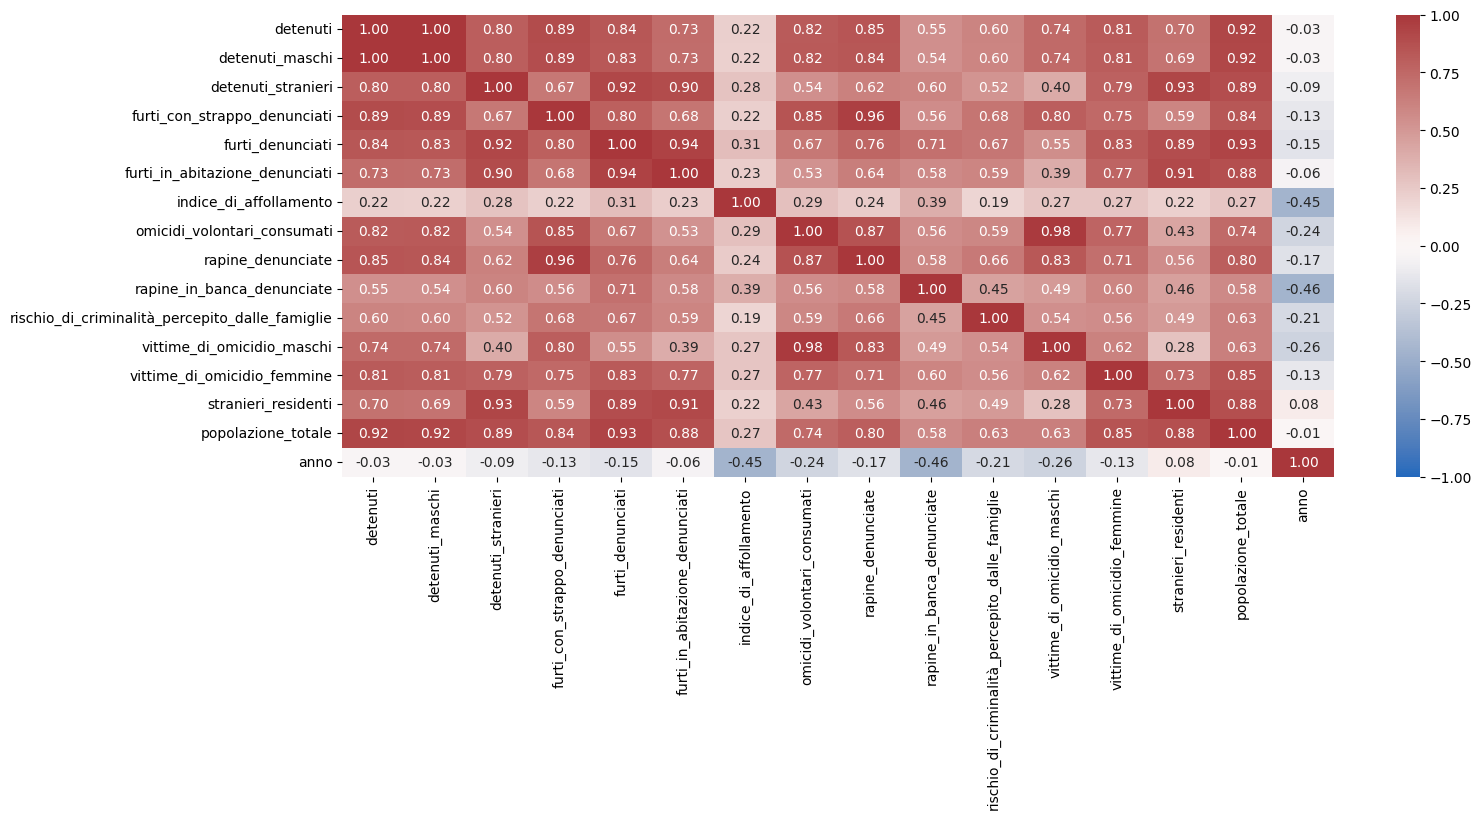

In [40]:
# HEATMAP CORRELAZIONE DETENUTI

plt.figure(figsize=(16, 6))
sns.heatmap(dfcorr, vmin=-1, vmax=1, annot=True, fmt='.2f', cmap='vlag')
plt.show()

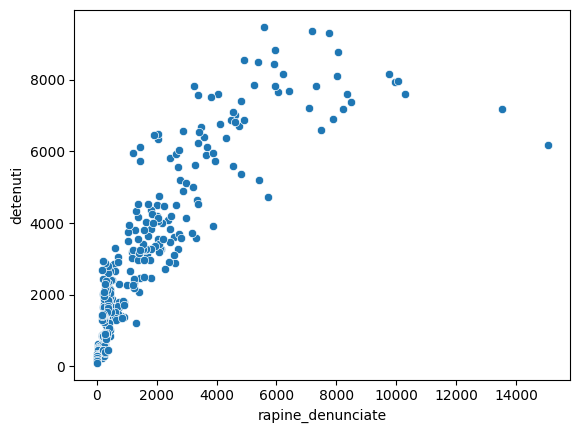

In [41]:
# SCATTERPLOT DETENUTI E RAPINE

sns.scatterplot(y='detenuti', x='rapine_denunciate', data=unpivot_df_clean)
plt.show()

In [42]:
# TEST CON NORMALIZZAZIONE (Cond. N condizionato dall'unità di misura dei predittori)
rapine_norm =np.log(unpivot_df_clean['rapine_denunciate'])
rapine_norm

0      6.285719
1      6.158664
2      5.892988
3      5.838688
4      6.120909
         ...   
315    7.137653
316    7.016051
317    6.934416
318    7.089467
319    7.359017
Name: rapine_denunciate, Length: 320, dtype: float64

In [43]:
# REGRESSIONE PER DETENUTI

Y = unpivot_df_clean['detenuti']
X = pd.concat([unpivot_df_clean['rapine_denunciate'],
                unpivot_df_clean['vittime_di_omicidio_femmine']], axis=1)

X_centered = X
X_centered = sm.add_constant(X_centered)

model_mr_final = sm.OLS(endog=Y, exog=X_centered)
results_mr_final = model_mr_final.fit()

In [44]:
# SOMMARIO REGRESSIONE DETENUTI

results_mr_final.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               detenuti   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.804
Method:                 Least Squares   F-statistic:                     657.0
Date:                Mon, 22 Dec 2025   Prob (F-statistic):          1.77e-113
Time:                        13:30:14   Log-Likelihood:                -2687.2
No. Observations:                 320   AIC:                             5380.
Df Residuals:                     317   BIC:                             5392.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                         782.3908     90.978      8.600      0.000     603.393     961.388
rapine_denunciate               0.5614      0.037     15.324      0.000       0.489       0.633
vittime_di_omicidio_femmine   166.4213     13.669     12.175      0.000     139.527     193.315
==============================================================================
Omnibus:                       23.020   Durbin-Watson:                   0.775
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               76.321
Skew:                           0.137   Prob(JB):                     2.67e-17
Kurtosis:                       5.377   Cond. No.                     4.41e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.41e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [45]:
# VARIANCE INFLATION FACTOR PER DETENUTI

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data['feature'] = X_centered.columns
vif_data['VIF'] = [variance_inflation_factor(X_centered.values, i) for i in range(X_centered.shape[1])]

print(vif_data)

                       feature       VIF
0                        const  2.277847
1            rapine_denunciate  2.025836
2  vittime_di_omicidio_femmine  2.025836


### SPLIT TEST - DETENUTI

In [46]:
# SPLIT TEST DATASET PER DETENUTI

X_train, X_test, Y_train, Y_test = train_test_split(X_centered, Y, test_size=0.3, random_state=42)

In [47]:
# ADDESTRAMENTO REGRESSIONE X SPLIT TEST DETENUTI

model_mr = sm.OLS(endog=Y_train, exog=X_train)
results_mr = model_mr.fit()
results_mr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               detenuti   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.803
Method:                 Least Squares   F-statistic:                     456.4
Date:                Mon, 22 Dec 2025   Prob (F-statistic):           3.37e-79
Time:                        13:30:14   Log-Likelihood:                -1883.0
No. Observations:                 224   AIC:                             3772.
Df Residuals:                     221   BIC:                             3782.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                         726.5887    110.644      6.567      0.000     508.536     944.641
rapine_denunciate               0.4897      0.041     11.963      0.000       0.409       0.570
vittime_di_omicidio_femmine   184.2282     15.583     11.822      0.000     153.518     214.939
==============================================================================
Omnibus:                       14.004   Durbin-Watson:                   2.188
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               25.393
Skew:                           0.319   Prob(JB):                     3.06e-06
Kurtosis:                       4.521   Cond. No.                     4.60e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.6e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [48]:
# PREDIZIONE TRAIN X SPLIT TEST DETENUTI

pred_train = results_mr.predict(X_train)

In [49]:
# MAE TRAIN X SPLIT TEST DETENUTI

from sklearn.metrics import mean_absolute_error

naive_mae_mr = mean_absolute_error(Y_train, np.full_like(Y_train, np.mean(Y_train)))
regr_mae_mr = mean_absolute_error(Y_train, pred_train)

print(f'MAE del modello semplice: {naive_mae_mr:.2f}')
print(f'MAE del modello di regressione: {regr_mae_mr:.2f}')

MAE del modello semplice: 2014.62
MAE del modello di regressione: 827.43


In [50]:
# PREDIZIONE E MAE TEST X SPLIT TEST DETENUTI

pred_test = results_mr.predict(X_test)

print('Naive MAE:', mean_absolute_error(Y_test, np.full_like(Y_test, np.mean(Y_test))))
print('Testing MAE:', mean_absolute_error(Y_test, pred_test))

Naive MAE: 1984.8101128472224
Testing MAE: 811.6330595753634


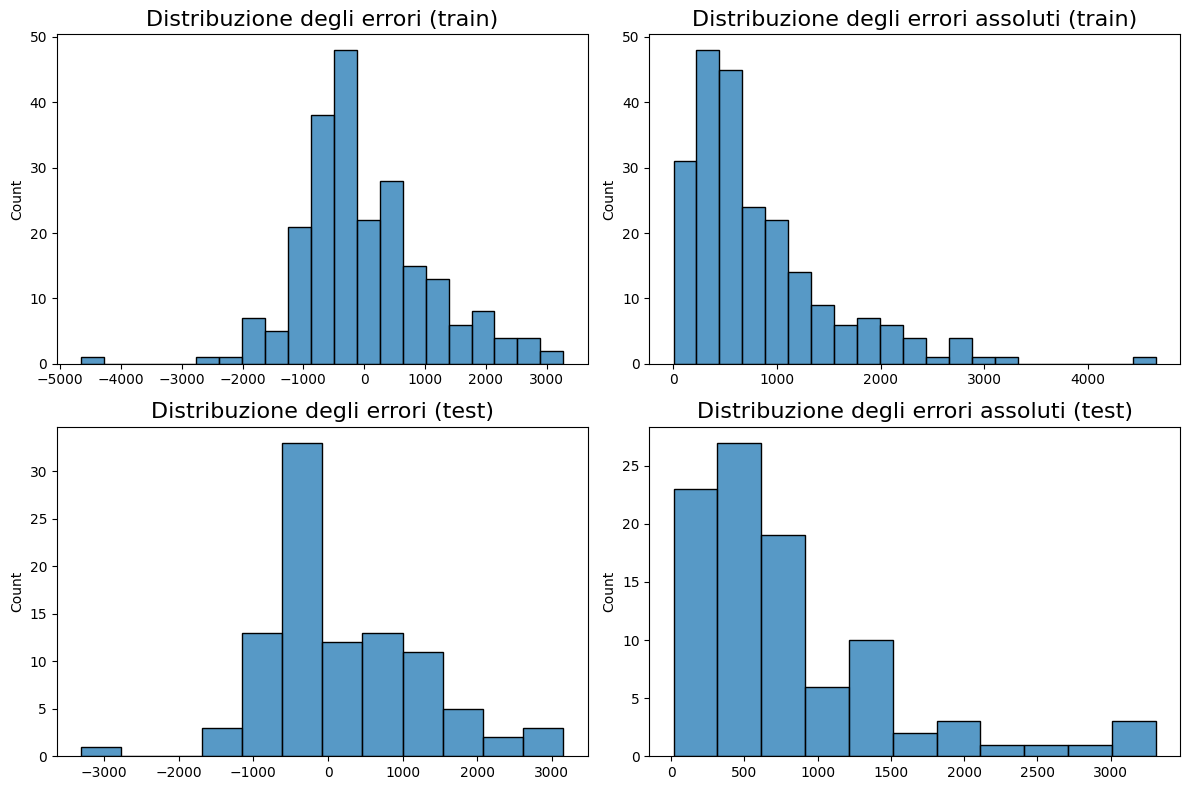

In [51]:
# DISTRIBUZIONI DEGLI ERRORI X SPLIT TEST DETENUTI

fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# errori training
sns.histplot(Y_train - pred_train, ax=axes[0][0]).set_title("Distribuzione degli errori (train)", size=16)
sns.histplot(np.abs(Y_train - pred_train), ax=axes[0][1]).set_title("Distribuzione degli errori assoluti (train)", size=16)

# errori test
sns.histplot(Y_test - pred_test, ax=axes[1][0]).set_title("Distribuzione degli errori (test)", size=16)
sns.histplot(np.abs(Y_test - pred_test), ax=axes[1][1]).set_title("Distribuzione degli errori assoluti (test)", size=16)

plt.tight_layout()

## REGRESSIONE - DETENUTI STRANIERI

In [52]:
# CORRELAZIONI PER DETENUTI STRANIERI

dfcorr_st = unpivot_df_clean[['detenuti_stranieri',
            'detenuti_maschi',
            'detenuti',
            'furti_con_strappo_denunciati',
            'furti_denunciati',
            'furti_in_abitazione_denunciati',
            'indice_di_affollamento',
            'omicidi_volontari_consumati',
            'rapine_denunciate',
            'rapine_in_banca_denunciate',
            'rischio_di_criminalità_percepito_dalle_famiglie',
            'vittime_di_omicidio_maschi',
            'vittime_di_omicidio_femmine',
            'stranieri_residenti',
            'popolazione_totale'
            ]].corr()
dfcorr_st

,detenuti_stranieri,detenuti_maschi,detenuti,furti_con_strappo_denunciati,furti_denunciati,furti_in_abitazione_denunciati,indice_di_affollamento,omicidi_volontari_consumati,rapine_denunciate,rapine_in_banca_denunciate,rischio_di_criminalità_percepito_dalle_famiglie,vittime_di_omicidio_maschi,vittime_di_omicidio_femmine,stranieri_residenti,popolazione_totale
detenuti_stranieri,1.000000,0.797510,0.804036,0.668862,0.920225,0.895644,0.280727,0.541101,0.619413,0.601704,0.516354,0.403714,0.786402,0.927869,0.887789
detenuti_maschi,0.797510,1.000000,0.999677,0.890555,0.828317,0.726061,0.218210,0.820839,0.843139,0.541914,0.596868,0.741351,0.810895,0.692393,0.920020
detenuti,0.804036,0.999677,1.000000,0.891103,0.836714,0.732519,0.222353,0.819301,0.845425,0.546871,0.601906,0.738598,0.813417,0.701902,0.924623
furti_con_strappo_denunciati,0.668862,0.890555,0.891103,1.000000,0.795158,0.681755,0.223324,0.853599,0.960055,0.561233,0.680628,0.803935,0.745476,0.594176,0.840087
furti_denunciati,0.920225,0.828317,0.836714,0.795158,1.000000,0.943976,0.311121,0.668232,0.762119,0.706766,0.672878,0.547433,0.826355,0.885738,0.930969
furti_in_abitazione_denunciati,0.895644,0.726061,0.732519,0.681755,0.943976,1.000000,0.233119,0.529674,0.637625,0.577473,0.594205,0.394724,0.771174,0.908540,0.876057
indice_di_affollamento,0.280727,0.218210,0.222353,0.223324,0.311121,0.233119,1.000000,0.289448,0.239394,0.388572,0.188449,0.266855,0.269831,0.217510,0.272128
omicidi_volontari_consumati,0.541101,0.820839,0.819301,0.853599,0.668232,0.529674,0.289448,1.000000,0.866957,0.556876,0.591656,0.976576,0.770331,0.430727,0.741095
rapine_denunciate,0.619413,0.843139,0.845425,0.960055,0.762119,0.637625,0.239394,0.866957,1.000000,0.578487,0.661737,0.831884,0.711601,0.561518,0.801633
rapine_in_banca_denunciate,0.601704,0.541914,0.546871,0.561233,0.706766,0.577473,0.388572,0.556876,0.578487,1.000000,0.452096,0.486945,0.597557,0.455167,0.577381


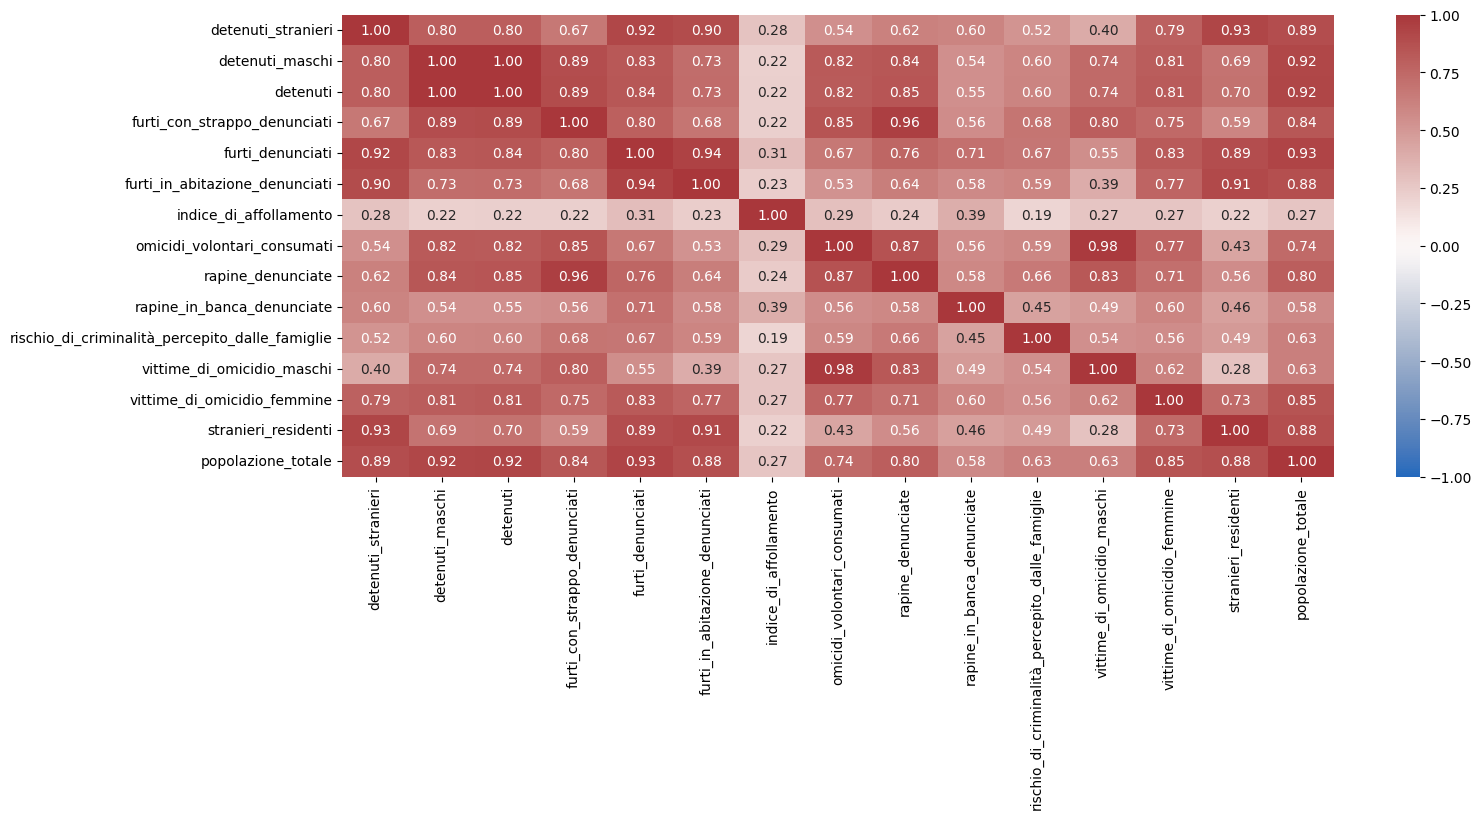

In [53]:
# HEATMAP CORRELAZIONE DETENUTI STRANIERI

plt.figure(figsize=(16, 6))
sns.heatmap(dfcorr_st, vmin=-1, vmax=1, annot=True, fmt='.2f', cmap='vlag')
plt.show()

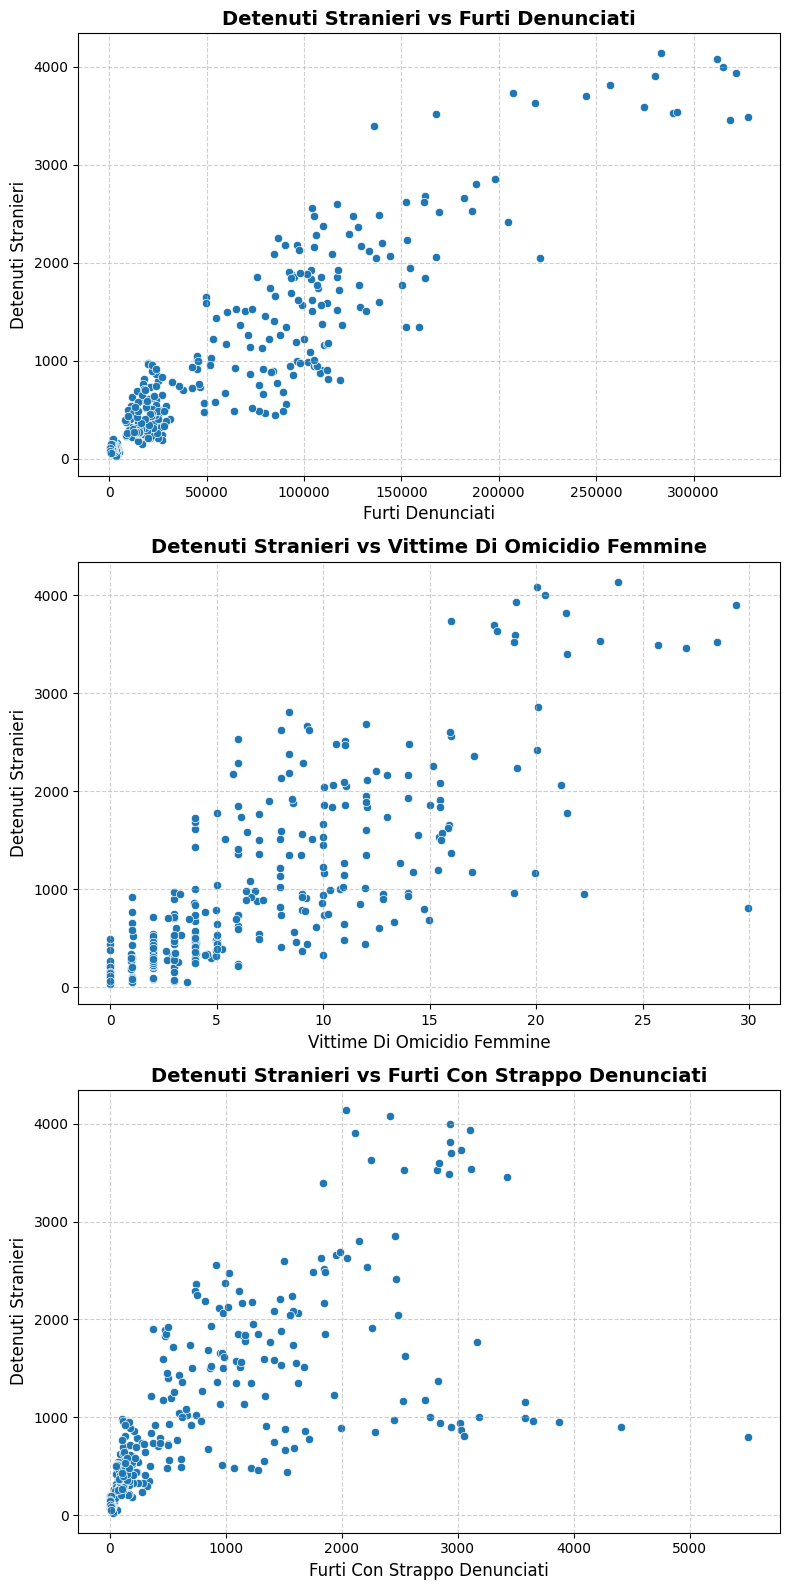

In [54]:
# SCATTERPLOT FURTI DENUNCIATI, VITTIME DI OMICIDIO, FURTI CON STRAPPO PER DETENUTI STRANIERI

variabili_X = ['furti_denunciati', 
               'vittime_di_omicidio_femmine',
               'furti_con_strappo_denunciati']

fig, axes = plt.subplots(3, 1, figsize=(8, 16))

axes_flat = axes.flatten()
num_variabili = len(variabili_X)

for i, col in enumerate(variabili_X):
    
    ax = axes_flat[i]
    
    sns.scatterplot(y='detenuti_stranieri', x=col, data=unpivot_df_clean, ax=ax)

    ax.set_title(f'Detenuti Stranieri vs {col.replace("_", " ").title()}', fontsize=14, fontweight='bold')
    ax.set_xlabel(col.replace("_", " ").title(), fontsize=12)
    ax.set_ylabel('Detenuti Stranieri', fontsize=12)
    ax.grid(True, linestyle='--', alpha=0.6)
    
for j in range(num_variabili, len(axes_flat)):
    fig.delaxes(axes_flat[j])

plt.tight_layout()
plt.show()

<Axes: xlabel='stranieri_residenti', ylabel='Count'>

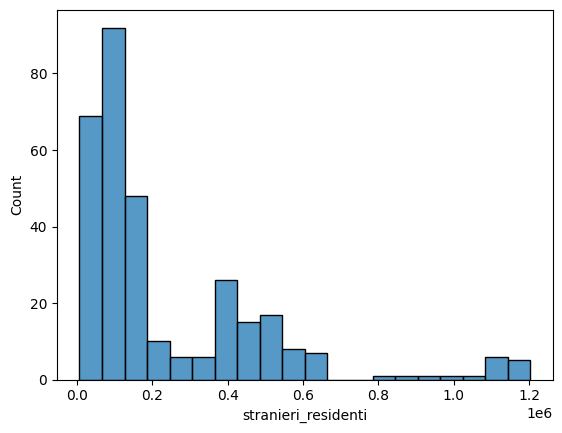

In [55]:
# CONTROLLO DISTRIBUZIONI VARIABILI

#sns.histplot(unpivot_df_clean['furti_denunciati'], bins=20)
#sns.histplot(unpivot_df_clean['vittime_di_omicidio_femmine'], bins=20)
#sns.histplot(unpivot_df_clean['furti_con_strappo_denunciati'], bins=20)
sns.histplot(unpivot_df_clean['stranieri_residenti'], bins=20)

In [56]:
# TEST CON NORMALIZZAZIONE (Cond. N condizionato dall'unità di misura dei predittori)

stranieri_residenti_norm = np.log(unpivot_df_clean['stranieri_residenti'])
furti_denunciati_norm = np.log(unpivot_df_clean['furti_denunciati'])
#concat_st = pd.concat([furti_denunciati_norm, unpivot_df_clean['vittime_di_omicidio_femmine']], axis=1)

In [57]:
# REGRESSIONE PER DETENUTI STRANIERI

Y_st = unpivot_df_clean['detenuti_stranieri']
X_st = pd.concat([unpivot_df_clean['stranieri_residenti'], 
                  unpivot_df_clean['rapine_denunciate'],
                  unpivot_df_clean['vittime_di_omicidio_femmine'],
                  ],axis=1)

X_st_centered = sm.add_constant(X_st)

model_mr_st_final = sm.OLS(endog=Y_st, exog=X_st_centered)
results_mr_st_final = model_mr_st_final.fit()

In [58]:
# SOMMARIO REGRESSIONE PER DETENUTI STRANIERI

results_mr_st_final.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     detenuti_stranieri   R-squared:                       0.887
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                     823.4
Date:                Mon, 22 Dec 2025   Prob (F-statistic):          5.84e-149
Time:                        13:30:21   Log-Likelihood:                -2298.3
No. Observations:                 320   AIC:                             4605.
Df Residuals:                     316   BIC:                             4620.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                         125.5876     27.113      4.632      0.000      72.242     178.933
stranieri_residenti             0.0027      0.000     26.962      0.000       0.003       0.003
rapine_denunciate               0.0251      0.011      2.296      0.022       0.004       0.047
vittime_di_omicidio_femmine    28.1466      4.972      5.661      0.000      18.364      37.929
==============================================================================
Omnibus:                       32.794   Durbin-Watson:                   0.407
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               43.277
Skew:                           0.730   Prob(JB):                     4.00e-10
Kurtosis:                       4.055   Cond. No.                     5.33e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.33e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [59]:
# VARIANCE INFLATION FACTOR PER DETENUTI STRANIERI

vif_data = pd.DataFrame()
vif_data['feature'] = X_st_centered.columns
vif_data['VIF'] = [variance_inflation_factor(X_st_centered.values, i) for i in range(X_st_centered.shape[1])]

print(vif_data)

                       feature       VIF
0                        const  2.291233
1          stranieri_residenti  2.188613
2            rapine_denunciate  2.039193
3  vittime_di_omicidio_femmine  3.035792


### SPLIT TEST - DETENUTI STRANIERI

In [60]:
# SPLIT TEST PER DETENUTI STRANIERI

X_st_train, X_st_test, Y_st_train, Y_st_test = train_test_split(X_st_centered, Y_st, test_size=0.3, random_state=42)

In [61]:
# ADDESTRAMENTO REGRESSIONE X SPLIT TEST DETENUTI STRANIERI

model_mr_st = sm.OLS(Y_st_train,X_st_train)
results_mr_st = model_mr_st.fit()
results_mr_st.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     detenuti_stranieri   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.893
Method:                 Least Squares   F-statistic:                     621.8
Date:                Mon, 22 Dec 2025   Prob (F-statistic):          4.03e-107
Time:                        13:30:21   Log-Likelihood:                -1606.4
No. Observations:                 224   AIC:                             3221.
Df Residuals:                     220   BIC:                             3234.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                         113.7579     32.281      3.524      0.001      50.139     177.377
stranieri_residenti             0.0027      0.000     21.046      0.000       0.002       0.003
rapine_denunciate               0.0214      0.012      1.795      0.074      -0.002       0.045
vittime_di_omicidio_femmine    32.4984      6.061      5.362      0.000      20.553      44.444
==============================================================================
Omnibus:                       21.881   Durbin-Watson:                   2.299
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.334
Skew:                           0.686   Prob(JB):                     1.16e-06
Kurtosis:                       4.022   Cond. No.                     5.44e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.44e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [62]:
# PREDIZIONE TRAIN X SPLIT TEST DETENUTI STRANIERI

pred_train_st = results_mr_st.predict(X_st_train)

In [63]:
# MAE TRAIN X SPLIT TEST DETENUTI STRANIERI

naive_mae_st = mean_absolute_error(Y_st_train, np.full_like(Y_st_train, np.mean(Y_st_train)))
regr_mae_st = mean_absolute_error(Y_st_train, pred_train_st)

print(f'MAE del modello semplice: {naive_mae_st:.2f}')
print(f'MAE del modello di regressione: {regr_mae_st:.2f}')

MAE del modello semplice: 785.61
MAE del modello di regressione: 235.00


In [64]:
# PREDIZIONE E MAE TEST X SPLIT TEST DETENUTI STRANIERI

pred_test_st = results_mr_st.predict(X_st_test)

print('Naive MAE:', mean_absolute_error(Y_st_test, np.full_like(Y_st_test, np.mean(Y_st_test))))
print('Testing MAE:', mean_absolute_error(Y_st_test, pred_test_st))

Naive MAE: 662.8511284722222
Testing MAE: 245.04707668875758


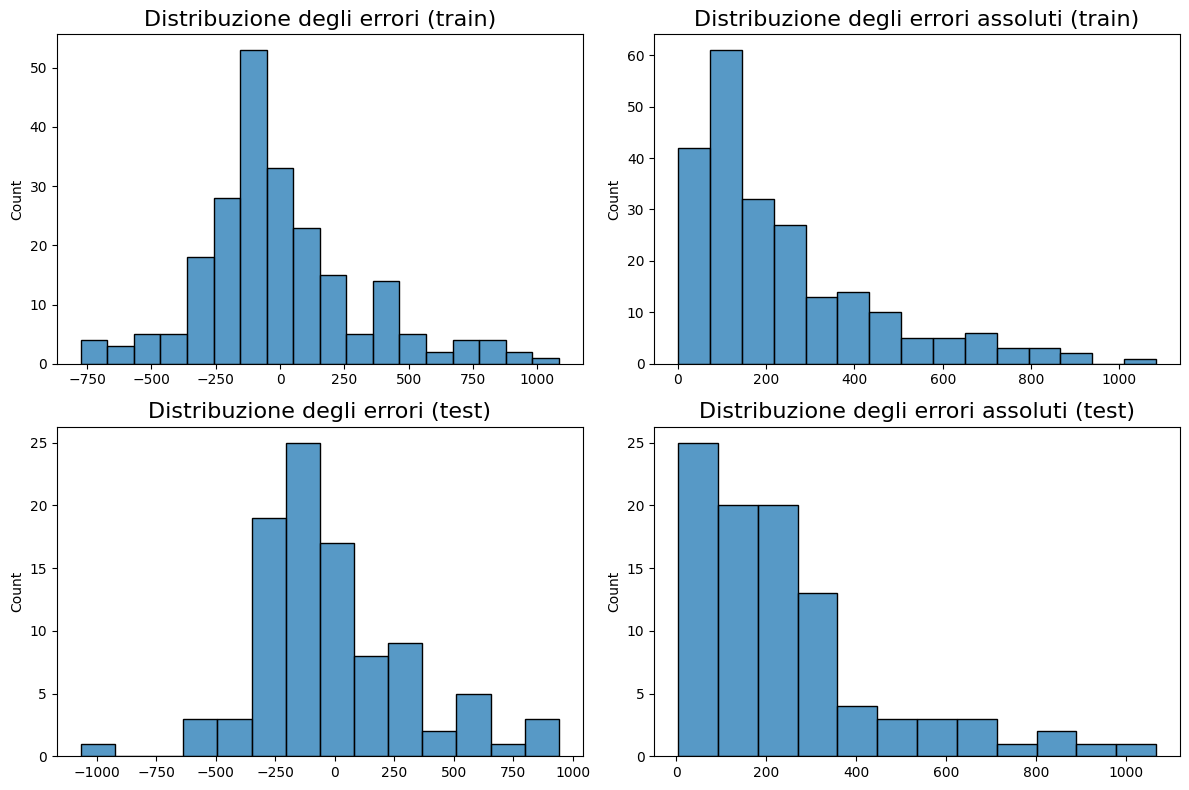

In [65]:
# DISTRIBUZIONI DEGLI ERRORI X SPLIT TEST DETENUTI STRANIERI

fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# errori training
sns.histplot(Y_st_train - pred_train_st, ax=axes[0][0]).set_title("Distribuzione degli errori (train)", size=16)
sns.histplot(np.abs(Y_st_train - pred_train_st), ax=axes[0][1]).set_title("Distribuzione degli errori assoluti (train)", size=16)

# errori test
sns.histplot(Y_st_test - pred_test_st, ax=axes[1][0]).set_title("Distribuzione degli errori (test)", size=16)
sns.histplot(np.abs(Y_st_test - pred_test_st), ax=axes[1][1]).set_title("Distribuzione degli errori assoluti (test)", size=16)

plt.tight_layout()

## REGRESSIONE - RISCHIO DI CRIMINALITA' PERCEPITO DALLE FAMIGLIE

In [66]:
# CORRELAZIONI PER RISCHIO DI CRIMINALITA PERCEPITO DALLE FAMIGLIE

dfcorr_perc = unpivot_df_clean[['rischio_di_criminalità_percepito_dalle_famiglie',
                            'detenuti_stranieri',
                            'detenuti_maschi',
                            'detenuti',
                            'furti_con_strappo_denunciati',
                            'furti_denunciati',
                            'furti_in_abitazione_denunciati',
                            'indice_di_affollamento',
                            'omicidi_volontari_consumati',
                            'rapine_denunciate',
                            'rapine_in_banca_denunciate',
                            'vittime_di_omicidio_maschi',
                            'vittime_di_omicidio_femmine',
                            'stranieri_residenti',
                            'popolazione_totale'
                            ]].corr()
dfcorr_perc

,rischio_di_criminalità_percepito_dalle_famiglie,detenuti_stranieri,detenuti_maschi,detenuti,furti_con_strappo_denunciati,furti_denunciati,furti_in_abitazione_denunciati,indice_di_affollamento,omicidi_volontari_consumati,rapine_denunciate,rapine_in_banca_denunciate,vittime_di_omicidio_maschi,vittime_di_omicidio_femmine,stranieri_residenti,popolazione_totale
rischio_di_criminalità_percepito_dalle_famiglie,1.000000,0.516354,0.596868,0.601906,0.680628,0.672878,0.594205,0.188449,0.591656,0.661737,0.452096,0.542593,0.560098,0.488374,0.625337
detenuti_stranieri,0.516354,1.000000,0.797510,0.804036,0.668862,0.920225,0.895644,0.280727,0.541101,0.619413,0.601704,0.403714,0.786402,0.927869,0.887789
detenuti_maschi,0.596868,0.797510,1.000000,0.999677,0.890555,0.828317,0.726061,0.218210,0.820839,0.843139,0.541914,0.741351,0.810895,0.692393,0.920020
detenuti,0.601906,0.804036,0.999677,1.000000,0.891103,0.836714,0.732519,0.222353,0.819301,0.845425,0.546871,0.738598,0.813417,0.701902,0.924623
furti_con_strappo_denunciati,0.680628,0.668862,0.890555,0.891103,1.000000,0.795158,0.681755,0.223324,0.853599,0.960055,0.561233,0.803935,0.745476,0.594176,0.840087
furti_denunciati,0.672878,0.920225,0.828317,0.836714,0.795158,1.000000,0.943976,0.311121,0.668232,0.762119,0.706766,0.547433,0.826355,0.885738,0.930969
furti_in_abitazione_denunciati,0.594205,0.895644,0.726061,0.732519,0.681755,0.943976,1.000000,0.233119,0.529674,0.637625,0.577473,0.394724,0.771174,0.908540,0.876057
indice_di_affollamento,0.188449,0.280727,0.218210,0.222353,0.223324,0.311121,0.233119,1.000000,0.289448,0.239394,0.388572,0.266855,0.269831,0.217510,0.272128
omicidi_volontari_consumati,0.591656,0.541101,0.820839,0.819301,0.853599,0.668232,0.529674,0.289448,1.000000,0.866957,0.556876,0.976576,0.770331,0.430727,0.741095
rapine_denunciate,0.661737,0.619413,0.843139,0.845425,0.960055,0.762119,0.637625,0.239394,0.866957,1.000000,0.578487,0.831884,0.711601,0.561518,0.801633


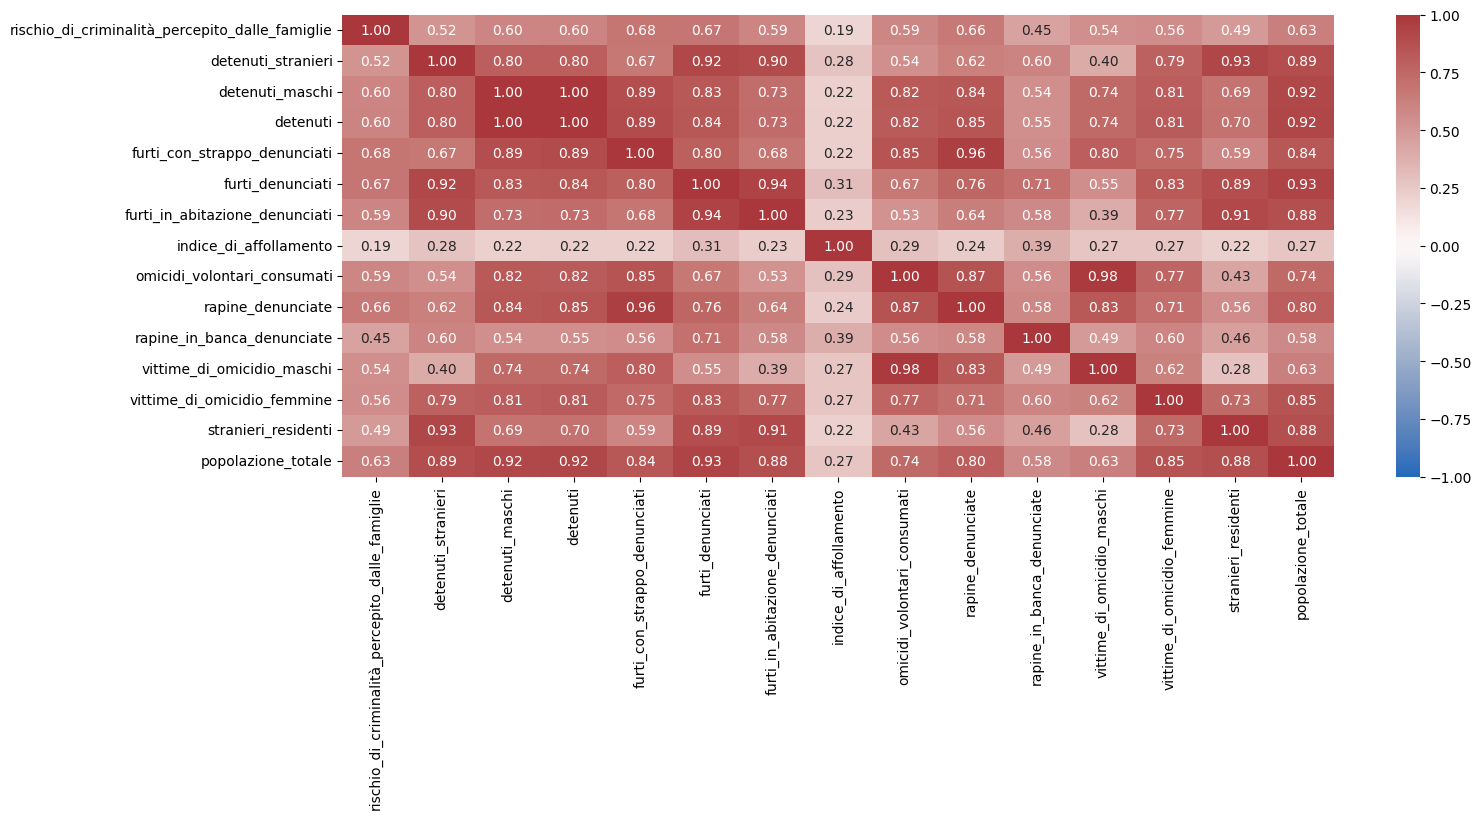

In [67]:
# HEATMAP CORRELAZIONI PER RISCHIO DI CRIMINALITA PERCEPITO DALLE FAMIGLIE

plt.figure(figsize=(16, 6))
sns.heatmap(dfcorr_perc, vmin=-1, vmax=1, annot=True, fmt='.2f', cmap='vlag')
plt.show()

<Axes: xlabel='rapine_in_banca_denunciate', ylabel='Count'>

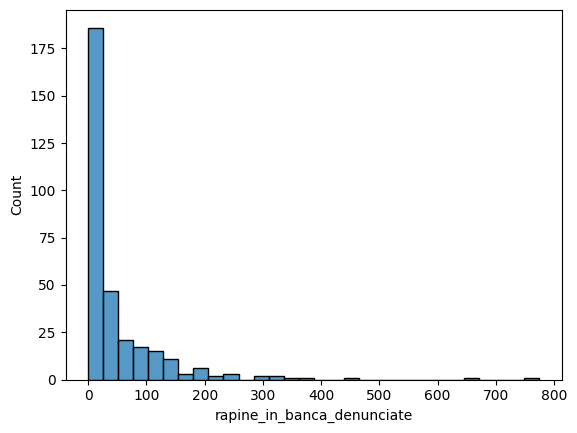

In [68]:
# CONTROLLO DISTRIBUZIONI VARIABILI

#sns.histplot(x='rischio_di_criminalità_percepito_dalle_famiglie', bins=30, data=unpivot_df_clean)
#sns.histplot(x='furti_denunciati', bins=30, data=unpivot_df_clean)
#sns.histplot(x='rapine_denunciate', bins=30, data=unpivot_df_clean)
sns.histplot(x='rapine_in_banca_denunciate', bins=30, data=unpivot_df_clean)
#sns.histplot(x='furti_in_abitazione_denunciati', bins=30, data=unpivot_df_clean)
#sns.histplot(x='furti_con_strappo_denunciati', bins=30, data=unpivot_df_clean)
#sns.histplot(x='vittime_di_omicidio_maschi', bins=30, data=unpivot_df_clean)
#sns.histplot(x='omicidi_volontari_consumati', bins=30, data=unpivot_df_clean)

In [69]:
# TEST CON NORMALIZZAZIONE (Cond. N condizionato dall'unità di misura dei predittori)

furti_in_abitazione_denunciati_norm = np.log(unpivot_df_clean['furti_in_abitazione_denunciati'])
furti_con_strappo_denunciati_norm = np.log(unpivot_df_clean['furti_con_strappo_denunciati'])
furti_denunciati_norm = np.log(unpivot_df_clean['furti_denunciati'])
rapine_denunciate_norm = np.log(unpivot_df_clean['rapine_denunciate'])

In [70]:
# REGRESSIONE PER RISCHIO DI CRIMINALITA PERCEPITO DALLE FAMIGLIE

Y_perc = unpivot_df_clean['rischio_di_criminalità_percepito_dalle_famiglie']
X_perc = pd.concat([unpivot_df_clean['furti_denunciati'],
                    unpivot_df_clean['rapine_denunciate']], axis=1)

X_perc_centered = X_perc
X_perc_centered = sm.add_constant(X_perc_centered)

model_mr_perc_final = sm.OLS(endog=Y_perc, exog=X_perc_centered)
results_mr_perc_final = model_mr_perc_final.fit()

In [71]:
# SOMMARIO REGRESSIONE PER RISCHIO DI CRIMINALITA PERCEPITO DALLE FAMIGLIE

results_mr_perc_final.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                           OLS Regression Results                                          
===========================================================================================================
Dep. Variable:     rischio_di_criminalità_percepito_dalle_famiglie   R-squared:                       0.506
Model:                                                         OLS   Adj. R-squared:                  0.503
Method:                                              Least Squares   F-statistic:                     162.1
Date:                                             Mon, 22 Dec 2025   Prob (F-statistic):           3.17e-49
Time:                                                     13:30:26   Log-Likelihood:                -1087.7
No. Observations:                                              320   AIC:                             2181.
Df Residuals:                                                  317   BIC:                             2193.
Df Model:                                                        2                                         
Covariance Type:                                         nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                17.1599      0.559     30.678      0.000      16.059      18.260
furti_denunciati   6.062e-05   9.19e-06      6.593      0.000    4.25e-05    7.87e-05
rapine_denunciate     0.0016      0.000      5.825      0.000       0.001       0.002
==============================================================================
Omnibus:                       29.887   Durbin-Watson:                   0.598
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               36.578
Skew:                           0.725   Prob(JB):                     1.14e-08
Kurtosis:                       3.800   Cond. No.                     1.29e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.29e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [72]:
# VARIANCE INFLATION FACTOR PER RISCHIO DI CRIMINALITA PERCEPITO DALLE FAMIGLIE

vif_data = pd.DataFrame()
vif_data['feature'] = X_perc_centered.columns
vif_data['VIF'] = [variance_inflation_factor(X_perc_centered.values, i) for i in range(X_perc_centered.shape[1])]

print(vif_data)

             feature       VIF
0              const  1.890325
1   furti_denunciati  2.385641
2  rapine_denunciate  2.385641


### SPLIT TEST - RISCHIO DI CRIMINALITA' PERCEPITO DALLE FAMIGLIE

In [73]:
# SPLIT TEST PER RISCHIO DI CRIMINALITA PERCEPITO DALLE FAMIGLIE

X_perc_train, X_perc_test, Y_perc_train, Y_perc_test = train_test_split(X_perc_centered, Y_perc, test_size=0.3, random_state=42)

In [74]:
# ADDESTRAMENTO REGRESSIONE X SPLIT TEST RISCHIO DI CRIMINALITA PERCEPITO DALLE FAMIGLIE

model_mr_perc = sm.OLS(Y_perc_train,X_perc_train)
results_mr_perc = model_mr_perc.fit()
results_mr_perc.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                           OLS Regression Results                                          
===========================================================================================================
Dep. Variable:     rischio_di_criminalità_percepito_dalle_famiglie   R-squared:                       0.517
Model:                                                         OLS   Adj. R-squared:                  0.512
Method:                                              Least Squares   F-statistic:                     118.1
Date:                                             Mon, 22 Dec 2025   Prob (F-statistic):           1.31e-35
Time:                                                     13:30:26   Log-Likelihood:                -760.11
No. Observations:                                              224   AIC:                             1526.
Df Residuals:                                                  221   BIC:                             1536.
Df Model:                                                        2                                         
Covariance Type:                                         nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                17.3614      0.662     26.216      0.000      16.056      18.667
furti_denunciati   6.245e-05   1.02e-05      6.135      0.000    4.24e-05    8.25e-05
rapine_denunciate     0.0014      0.000      4.937      0.000       0.001       0.002
==============================================================================
Omnibus:                       20.819   Durbin-Watson:                   2.029
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               23.934
Skew:                           0.727   Prob(JB):                     6.35e-06
Kurtosis:                       3.670   Cond. No.                     1.32e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.32e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [75]:
# PREDIZIONE TRAIN X SPLIT TEST RISCHIO DI CRIMINALITA PERCEPITO DALLE FAMIGLIE

pred_train_perc = results_mr_perc.predict(X_perc_train)

In [76]:
# MAE TRAIN X SPLIT TEST RISCHIO DI CRIMINALITA PERCEPITO DALLE FAMIGLIE

naive_mae_perc = mean_absolute_error(Y_perc_train, np.full_like(Y_perc_train, np.mean(Y_perc_train)))
regr_mae_perc = mean_absolute_error(Y_perc_train, pred_train_perc)

print(f'MAE del modello semplice: {naive_mae_perc:.2f}')
print(f'MAE del modello di regressione: {regr_mae_perc:.2f}')

MAE del modello semplice: 8.47
MAE del modello di regressione: 5.73


In [77]:
# PREDIZIONE E MAE TEST X SPLIT TEST RISCHIO DI CRIMINALITA PERCEPITO DALLE FAMIGLIE

pred_test_perc = results_mr_perc.predict(X_perc_test)

print('Naive MAE:', mean_absolute_error(Y_perc_test, np.full_like(Y_perc_test, np.mean(Y_perc_test))))
print('Testing MAE:', mean_absolute_error(Y_perc_test, pred_test_perc))

Naive MAE: 8.46328125
Testing MAE: 5.580238728916207


Text(0.5, 1.0, 'Distribuzione degli errori assoluti (test)')

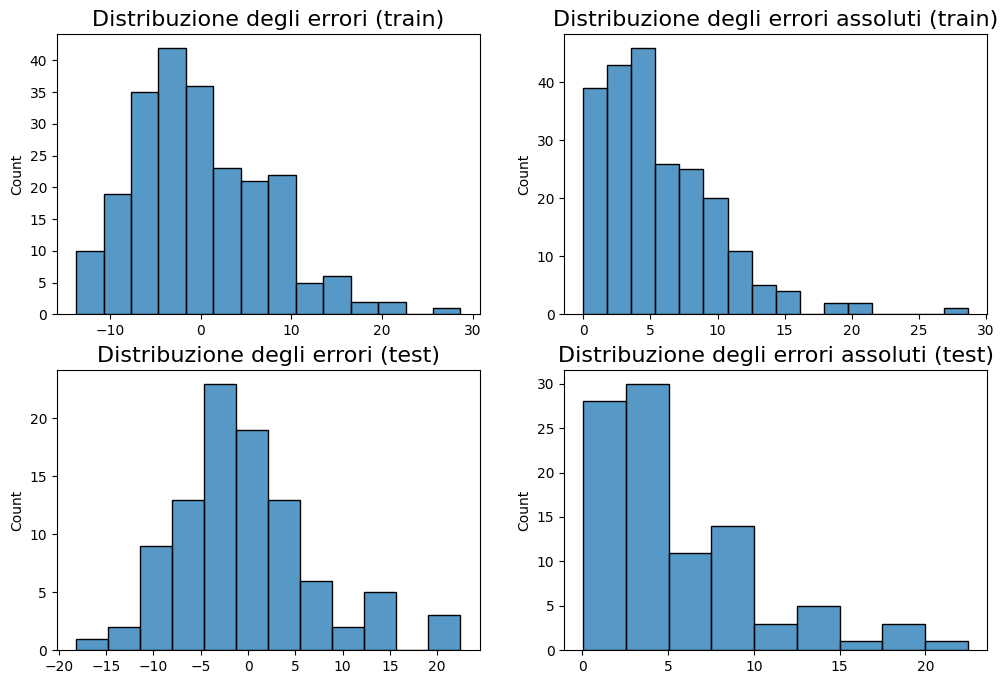

In [78]:
# DISTRIBUZIONI DEGLI ERRORI X SPLIT TEST RISCHIO DI CRIMINALITA PERCEPITO DALLE FAMIGLIE

fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# errori training
sns.histplot(Y_perc_train - pred_train_perc, ax=axes[0][0]).set_title("Distribuzione degli errori (train)", size=16)
sns.histplot(np.abs(Y_perc_train - pred_train_perc), ax=axes[0][1]).set_title("Distribuzione degli errori assoluti (train)", size=16)

# errori test
sns.histplot(Y_perc_test - pred_test_perc, ax=axes[1][0]).set_title("Distribuzione degli errori (test)", size=16)
sns.histplot(np.abs(Y_perc_test - pred_test_perc), ax=axes[1][1]).set_title("Distribuzione degli errori assoluti (test)", size=16)

## PREDIZIONI (2024 - 2030)
##### 1. DETENUTI
##### 2. DETENUTI STRANIERI
##### 3. RISCHIO DI CRIMINALITA' PERCEPITO DALLE FAMIGLIE

STEP: 
1. CALCOLO VARIAZIONE ANNUA
2. CALCOLO CAGR 
3. PREDIZIONE ULTIMO ANNO CON DATI REALI PER NORMALIZZAZIONE DATI PREDETTI
4. PREDIZIONI
5. CONFRONTO DI CONTROLLO
6. CREO NUOVO DF CON PREDIZIONI
7. UNISCO AI DATI REALI PER RAPPRESENTAZIONE E TRASFORMO NEL FORMATO CORRETTO
8. ESPORTO

In [79]:
# RINOMINO I NOSTRI RISULTATI DEGLI ADDESTRAMENTI

results_mr_detenuti = results_mr_final #Detenuti
results_mr_detenuti_stranieri = results_mr_st_final #Detenuti Stranieri
results_mr_percezione = results_mr_perc_final #Rischio di criminalita percepito dalle famiglie

In [80]:
# VARIAZIONI PER ANNO UNITE AL UNPIVOT_DF_CLEAN

# Ordino il DataFrame per territorio e anno
unpivot_df_clean = unpivot_df_clean.sort_values(by=['territorio', 'anno'])

# Definisci le colonne su cui calcolare la variazione.
colonne_per_analisi = [
    'popolazione_totale',
    'detenuti',
    'detenuti_maschi',
    'detenuti_stranieri',
    'furti_con_strappo_denunciati',
    'furti_denunciati',
    'furti_in_abitazione_denunciati',
    'omicidi_volontari_consumati',
    'rapine_denunciate',
    'rapine_in_banca_denunciate',
    'vittime_di_omicidio_maschi',
    'vittime_di_omicidio_femmine',
    'stranieri_residenti'
]

for col in colonne_per_analisi:
    # 1. Variazione Assoluta (Differenza)
    unpivot_df_clean[f'var_assoluta_{col}'] = \
        unpivot_df_clean.groupby('territorio')[col].diff()

    # 2. Variazione Percentuale (%)
    unpivot_df_clean[f'var_perc_{col}'] = \
        unpivot_df_clean.groupby('territorio')[col].pct_change() * 100

print("✅ Variazioni anno per anno calcolate con successo!")

unpivot_df_clean.head(20)

✅ Variazioni anno per anno calcolate con successo!


,territorio,anno,popolazione_totale,detenuti,detenuti_maschi,detenuti_stranieri,furti_con_strappo_denunciati,furti_denunciati,furti_in_abitazione_denunciati,omicidi_volontari_consumati,...,var_assoluta_rapine_denunciate,var_perc_rapine_denunciate,var_assoluta_rapine_in_banca_denunciate,var_perc_rapine_in_banca_denunciate,var_assoluta_vittime_di_omicidio_maschi,var_perc_vittime_di_omicidio_maschi,var_assoluta_vittime_di_omicidio_femmine,var_perc_vittime_di_omicidio_femmine,var_assoluta_stranieri_residenti,var_perc_stranieri_residenti
0,Abruzzo,2008,1321618.0,1359.0,1313.0,350.0,336.787916,25163.586690,2875.264001,9.048034,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Abruzzo,2009,1325731.0,1678.0,1626.0,440.0,230.877132,23093.736130,2067.856056,3.011441,...,-64.053777,-11.931411,-6.140187,-7.931935,-4.025919,-57.207801,-2.010674,-100.000000,4530.0,7.100091
2,Abruzzo,2010,1328889.0,1965.0,1910.0,447.0,214.287715,22070.633257,2091.808578,7.009411,...,-110.309520,-23.331304,-27.211611,-38.180606,-0.007407,-0.245978,4.005378,inf,3396.0,4.969853
3,Abruzzo,2011,1331236.0,1965.0,1902.0,407.0,183.175265,23586.567966,3152.015894,8.007662,...,-19.158193,-5.285213,-3.019889,-6.854170,-0.001160,-0.038621,0.999411,24.951724,4260.0,5.939103
4,Abruzzo,2012,1332164.0,2006.0,1942.0,372.0,184.112578,25352.502087,3713.270523,16.009789,...,111.949884,32.607221,-6.017853,-14.663646,4.001410,133.252702,4.000718,79.937799,4964.0,6.532610
5,Abruzzo,2013,1329501.0,1894.0,1821.0,298.0,322.014624,26092.184972,3994.181395,11.000500,...,55.744823,12.244118,11.980720,34.209699,-0.718283,-10.254913,-4.291007,-47.648699,2542.0,3.140132
6,Abruzzo,2014,1325400.0,1935.0,1864.0,240.0,273.639915,27073.373951,4287.358234,10.985544,...,-58.618531,-11.470816,-3.059958,-6.510254,-1.292571,-20.562690,1.277615,27.099696,1293.0,1.548614
7,Abruzzo,2015,1318841.0,1817.0,1746.0,192.0,190.643712,27369.849316,4667.277466,3.992538,...,-35.184408,-7.777198,-20.985080,-47.756124,-2.997160,-60.022077,-3.995846,-66.685064,-930.0,-1.096866
8,Abruzzo,2016,1313470.0,1691.0,1621.0,215.0,166.529771,25252.694184,4644.884280,5.983106,...,-44.273357,-10.611507,-12.985254,-56.563136,1.992468,99.809573,-0.001901,-0.095213,-697.0,-0.831177
9,Abruzzo,2017,1305657.0,1740.0,1672.0,210.0,156.625331,21224.228740,3915.633269,5.985681,...,-40.741594,-10.924234,-3.986161,-39.974169,-0.995896,-24.967711,0.998472,50.064579,-15.0,-0.018038


In [81]:
# CAGR (Compound Annual Growth Rate) REGIONALE UNIFICATO

# ====================================================================
# FUNZIONE CAGR REGIONALE
# ====================================================================

# 'colonne_per_analisi' sono già definite nella variazione.

def calcola_cagr(df, colonne, anno_i, anno_f):
    """Calcola il CAGR per un dato periodo e ritorna il DataFrame dei risultati."""
    num_periodi = anno_f - anno_i
    
    # Prepara il DataFrame di output
    cagr_df = pd.DataFrame(index=df['territorio'].unique())

    # Gestione di intervalli non validi
    if num_periodi <= 0:
        print(f"⚠️ Errore: Intervallo di tempo non valido ({anno_i}-{anno_f}).")
        return cagr_df

    for col in colonne:
        # Estrai i valori iniziali e finali per ogni territorio
        valori_iniziali = df[df['anno'] == anno_i].set_index('territorio')[col]
        valori_finali = df[df['anno'] == anno_f].set_index('territorio')[col]
        
        temp_df = pd.DataFrame({'iniziale': valori_iniziali, 'finale': valori_finali})

        # Calcolo del CAGR con gestione divisione per zero
        cagr = np.where(
            temp_df['iniziale'] > 0,
            ((temp_df['finale'] / temp_df['iniziale']) ** (1 / num_periodi) - 1) * 100,
            np.nan # Se il valore iniziale è zero o negativo, il CAGR non è calcolabile e ritorna NaN
        )
        cagr_df[f'CAGR_{col}_{anno_i}_{anno_f}_%'] = cagr

    return cagr_df

# ====================================================================
# CALCOLO CAGR PER TUTTI I RANGE SPECIFICATI
# ====================================================================

print("⏳ Calcolo CAGR per i range [2008-2023, 2018-2023]")

# 1. Calcola CAGR 2008-2023 (Lungo periodo)
cagr_results_08_23 = calcola_cagr(unpivot_df_clean, colonne_per_analisi, 2008, 2023)

# 2. Calcola CAGR 2019-2023 (Periodo breve, post-covid/recente)
cagr_results_19_23 = calcola_cagr(unpivot_df_clean, colonne_per_analisi, 2019, 2023)

# ====================================================================
# UNIFICAZIONE FINALE
# ====================================================================

# 5. CONCATENAZIONE DI TUTTI I RISULTATI NELL'ORDINE RICHIESTO
df_cagr_unificato = pd.concat(
    [cagr_results_19_23, cagr_results_08_23],
    axis=1
)

print("\n--------------------------------------------------")
print("✅ DataFrame Unificato dei CAGR per tutti i periodi calcolati:")
print("--------------------------------------------------")
df_cagr_unificato

⏳ Calcolo CAGR per i range [2008-2023, 2018-2023]

--------------------------------------------------
✅ DataFrame Unificato dei CAGR per tutti i periodi calcolati:
--------------------------------------------------


,CAGR_popolazione_totale_2019_2023_%,CAGR_detenuti_2019_2023_%,CAGR_detenuti_maschi_2019_2023_%,CAGR_detenuti_stranieri_2019_2023_%,CAGR_furti_con_strappo_denunciati_2019_2023_%,CAGR_furti_denunciati_2019_2023_%,CAGR_furti_in_abitazione_denunciati_2019_2023_%,CAGR_omicidi_volontari_consumati_2019_2023_%,CAGR_rapine_denunciate_2019_2023_%,CAGR_rapine_in_banca_denunciate_2019_2023_%,...,CAGR_detenuti_stranieri_2008_2023_%,CAGR_furti_con_strappo_denunciati_2008_2023_%,CAGR_furti_denunciati_2008_2023_%,CAGR_furti_in_abitazione_denunciati_2008_2023_%,CAGR_omicidi_volontari_consumati_2008_2023_%,CAGR_rapine_denunciate_2008_2023_%,CAGR_rapine_in_banca_denunciate_2008_2023_%,CAGR_vittime_di_omicidio_maschi_2008_2023_%,CAGR_vittime_di_omicidio_femmine_2008_2023_%,CAGR_stranieri_residenti_2008_2023_%
Abruzzo,-0.474211,-1.265587,-1.106932,-2.221963,1.395467,-6.163680,-2.260095,7.477799,-4.071774,-9.622304,...,-0.616373,-8.163854,-4.165823,-0.197253,-0.825974,-5.181506,-21.637058,-2.261371,2.694581,1.996745
Basilicata,-0.917236,-7.683665,-7.053769,-7.373374,-20.194046,-9.288074,-3.949760,-36.096434,-6.926033,-100.000000,...,-1.351421,-2.236486,-3.830367,0.761946,-8.844823,-0.935327,-100.000000,-8.844823,NaN,5.867832
Calabria,-0.741290,1.078678,1.029817,0.526015,-16.264819,-12.774775,-11.218742,-17.158599,-12.786329,NaN,...,2.861463,-8.181330,-6.220820,-2.270778,-8.356568,-8.099109,-17.845144,-10.316586,-1.925923,4.400360
Campania,-0.521547,-3.090753,-3.093945,-4.172624,-4.622511,-2.611777,-3.928255,3.859193,-9.098920,-28.260152,...,0.396620,-5.698830,-1.511771,-0.905652,-7.162022,-8.263821,-16.148911,-8.186711,-1.497080,5.264228
Emilia-Romagna,-0.068286,-1.050483,-1.149359,-2.725370,-3.838327,-7.603814,-9.442665,3.925310,0.350307,-12.609580,...,-0.694756,-1.226275,-4.189844,-0.249900,-1.443455,-1.448221,-19.562588,-1.624553,-1.237898,2.420743
Friuli-Venezia Giulia,-0.241293,-2.807109,-2.386727,-4.491392,-0.336100,-5.636633,-8.138023,-15.907436,2.908508,NaN,...,-3.249121,-2.540128,-4.334537,0.823775,-3.684978,-0.732179,-100.000000,-5.107178,-1.819943,1.895569
Lazio,-0.178366,-2.383371,-2.327372,-4.256083,-5.180727,-2.077218,-2.368580,0.015671,-6.196989,-18.542472,...,0.490369,-3.436706,-3.004163,-0.405021,-4.939043,-5.008672,-20.172605,-8.000469,0.804729,3.953454
Liguria,-0.258175,-2.227318,-2.318177,-1.625500,-0.116421,-7.245271,-13.986059,12.026078,4.935198,-20.427964,...,0.586719,-4.350616,-5.927342,-4.518199,0.630394,-2.930206,-22.183487,-4.522510,4.722096,3.204763
Lombardia,-0.065014,-1.037339,-0.848002,0.229066,0.761345,-4.091792,-9.263561,1.666561,3.702594,0.776165,...,0.451789,0.233855,-3.013313,-1.920785,-3.892303,-2.054244,-18.964208,-4.261688,-3.104817,2.576846
Marche,-0.458349,-2.053798,-1.958673,-0.969420,5.195203,-9.799868,-10.118425,-6.001730,-1.439203,-11.002874,...,-0.997387,-2.690527,-5.233488,-1.156939,-0.024281,-3.225113,-16.826675,-0.024281,-0.024281,0.463636


In [82]:
# PROVA DI PREDIZIONE DETENUTI ANNO 2023 PER VERIFICA MODELLO

# Dati Reali 2023 (Predittori)
ANNO_VERIFICA = 2023
colonne_predittive = [
    'rapine_denunciate', 
    'vittime_di_omicidio_femmine'
]

X_reale_2023 = unpivot_df_clean[unpivot_df_clean['anno'] == ANNO_VERIFICA].set_index('territorio')[colonne_predittive]
X_reale_2023_con_costante = sm.add_constant(X_reale_2023, has_constant='add')

# Stima del Modello per il 2023
Y_stimato_2023 = results_mr_detenuti.predict(X_reale_2023_con_costante).sum().round(0)

# Valore reale nel 2023 (somma di tutti i territori)
Y_reale_2023 = unpivot_df_clean[unpivot_df_clean['anno'] == ANNO_VERIFICA]['detenuti'].sum().round(0) 

print(f"Detenuti Totali REALI nel 2023 (Somma Territori): {Y_reale_2023}")
print(f"Detenuti Totali STIMATI dal MODELLO nel 2023:    {Y_stimato_2023}")
print(f"Differenza (Errore) Sull'anno base:               {Y_reale_2023 - Y_stimato_2023}")

Detenuti Totali REALI nel 2023 (Somma Territori): 56196.0
Detenuti Totali STIMATI dal MODELLO nel 2023:    51309.0
Differenza (Errore) Sull'anno base:               4887.0


In [83]:
# PREDIZIONI DETENUTI CORRETTA CON BIAS PER ANNO 2024-2030 BASATO SU CAGR 2019-2023

# ====================================================================
# VARIABILI CHIAVE E PARAMETRI DI PROIEZIONE
# ====================================================================

colonne_predittive = [
    'rapine_denunciate', 
    'vittime_di_omicidio_femmine'
]

# Periodo CAGR (Breve periodo post-COVID)
ANNO_INIZIALE_CAGR = 2019
ANNO_FINALE_CAGR = 2023
ANNO_PREDIZIONE_FINALE = 2030
ANNO_BASE_CORREZIONE = 2023 # Anno per ancorare la stima reale

# DataFrame per memorizzare i risultati finali
df_predizioni_detenuti_finali = pd.DataFrame(index=unpivot_df_clean['territorio'].unique())

# DataFrame che contiene i valori dei predittori che saranno proiettati
df_predittori_anno_corrente = unpivot_df_clean[unpivot_df_clean['anno'] == ANNO_FINALE_CAGR].set_index('territorio')[colonne_predittive].copy()

# ====================================================================
# PASSO 1: CALCOLO DEL FATTORE DI CORREZIONE GLOBALE (BIAS)
# ====================================================================

# 1.1 Stima del Modello per il 2023 (Totale Italia)
X_reale_2023 = unpivot_df_clean[unpivot_df_clean['anno'] == ANNO_BASE_CORREZIONE].set_index('territorio')[colonne_predittive]
X_reale_2023_con_costante = sm.add_constant(X_reale_2023, has_constant='add')
Y_stimato_Totale_2023 = results_mr_detenuti.predict(X_reale_2023_con_costante).sum()
Y_reale_Totale_2023 = unpivot_df_clean[unpivot_df_clean['anno'] == ANNO_BASE_CORREZIONE]['detenuti'].sum()

# 1.2 Calcolo del Fattore di Correzione GLOBALE (Ratio)
# Forziamo un valore minimo di 1e-6 per evitare divisione per zero nel caso in cui la stima totale sia 0.
Fattore_Correzione_Globale = Y_reale_Totale_2023 / max(Y_stimato_Totale_2023, 1e-6)

print(f"Fattore di Correzione Globale Calcolato: {Fattore_Correzione_Globale:.4f}")

# ====================================================================
# PASSO 2: PREPARAZIONE E GESTIONE NaN NEI FATTORI DI CRESCITA (CAGR 2019-2023)
# ====================================================================

fattori_crescita = {}
for col in colonne_predittive:
    cagr_col = f'CAGR_{col}_{ANNO_INIZIALE_CAGR}_{ANNO_FINALE_CAGR}_%'
    
    # Estrai i CAGR regionali (usando cagr_results_19_23)
    cagr_regionali = cagr_results_19_23[cagr_col]
    
    # Calcola il CAGR Medio Nazionale (escludendo NaN)
    cagr_nazionale_medio = cagr_regionali.mean(skipna=True)
    
    # Calcola il Fattore di Crescita Regionale (1 + CAGR/100)
    fattore_crescita_regionale = 1 + cagr_regionali.div(100)
    
    # Calcola il Fattore Nazionale Imputato
    fattore_nazionale_imputato = 1 + cagr_nazionale_medio / 100
    
    # Imputa i NaN con il Fattore di Crescita Medio Nazionale
    fattori_crescita[col] = fattore_crescita_regionale.fillna(fattore_nazionale_imputato)


# ====================================================================
# PASSO 3: PROIEZIONE ITERATIVA CON CORREZIONE (2024-2030)
# ====================================================================

print("\n✅ Inizio Proiezione Detenuti Totali 2024-2030 (CAGR 2018-2023) CON CORREZIONE...")

for anno in range(ANNO_FINALE_CAGR + 1, ANNO_PREDIZIONE_FINALE + 1):
    
    # 1. PROIEZIONE DEI PREDITTORI (X)
    for col in colonne_predittive:
        # Usa i fattori di crescita imputati (senza NaN)
        df_predittori_anno_corrente[col] *= fattori_crescita[col]

    # 2. PREDIZIONE NON CORRETTA (Y_stimato)
    X_pred_anno_corrente_con_costante = sm.add_constant(df_predittori_anno_corrente, has_constant='add')
    prev_detenuti_stimati = results_mr_detenuti.predict(X_pred_anno_corrente_con_costante)
    
    # 3. APPLICAZIONE DELLA CORREZIONE DEL BIAS GLOBALE
    prev_detenuti_corretti = prev_detenuti_stimati * Fattore_Correzione_Globale
    
    # 4. SALVATAGGIO DEL RISULTATO (Gestione finale di NaN residui e valori negativi)
    colonna_risultato = f'detenuti_stimati_{anno}'
    df_predizioni_detenuti_finali[colonna_risultato] = prev_detenuti_corretti.fillna(0).round(0).clip(lower=0)

print("✅ Proiezione 2024-2030 completata.")

# ====================================================================
# RISULTATO FINALE
# ====================================================================

df_predizioni_detenuti_finali.index.name = 'Territorio'
df_predizioni_detenuti_finali.reset_index(inplace=True)

print("\n======================================================================================")
print(f"✅ Previsioni Detenuti (TOTALE) 2024-2030 (CAGR 2019-2023, Corrette per Bias e NaN)")
print("======================================================================================")
df_predizioni_detenuti_finali

Fattore di Correzione Globale Calcolato: 1.0952

✅ Inizio Proiezione Detenuti Totali 2024-2030 (CAGR 2018-2023) CON CORREZIONE...
✅ Proiezione 2024-2030 completata.

✅ Previsioni Detenuti (TOTALE) 2024-2030 (CAGR 2019-2023, Corrette per Bias e NaN)


,Territorio,detenuti_stimati_2024,detenuti_stimati_2025,detenuti_stimati_2026,detenuti_stimati_2027,detenuti_stimati_2028,detenuti_stimati_2029,detenuti_stimati_2030
0,Abruzzo,1546.0,1540.0,1535.0,1529.0,1524.0,1519.0,1515.0
1,Basilicata,888.0,886.0,884.0,882.0,880.0,878.0,877.0
2,Calabria,1937.0,1813.0,1703.0,1606.0,1520.0,1444.0,1377.0
3,Campania,5297.0,5077.0,4876.0,4692.0,4524.0,4371.0,4231.0
4,Emilia-Romagna,3959.0,3964.0,3968.0,3973.0,3977.0,3981.0,3986.0
5,Friuli-Venezia Giulia,1310.0,1265.0,1228.0,1198.0,1174.0,1154.0,1139.0
6,Lazio,4924.0,5129.0,5376.0,5667.0,6007.0,6402.0,6856.0
7,Liguria,3040.0,3272.0,3532.0,3821.0,4145.0,4507.0,4912.0
8,Lombardia,7654.0,7719.0,7791.0,7871.0,7960.0,8056.0,8161.0
9,Marche,1708.0,1669.0,1632.0,1597.0,1563.0,1531.0,1501.0


In [84]:
# PREDIZIONE DETENUTI STRANIERI CON BIAS PER ANNO (2024-2030) BASATO SULLA CAGR 2019-2023

# ====================================================================
# ASSUNZIONI E VARIABILI (Dai blocchi precedenti)
# ====================================================================

# Variabili del modello
results_mr_detenuti_stranieri = results_mr_st_final

colonne_predittive_stranieri = [
    'stranieri_residenti', 
    'rapine_denunciate', 
    'vittime_di_omicidio_femmine'
]

# Periodo CAGR (Breve periodo post-COVID)
ANNO_INIZIALE_CAGR = 2019
ANNO_FINALE_CAGR = 2023
ANNO_PREDIZIONE_FINALE = 2030
ANNO_BASE_CORREZIONE = 2023

# DataFrame per memorizzare i risultati finali
df_predizioni_detenuti_stranieri_finali = pd.DataFrame(index=unpivot_df_clean['territorio'].unique())

# DataFrame che contiene i valori dei predittori che saranno proiettati
df_predittori_anno_corrente_st = unpivot_df_clean[unpivot_df_clean['anno'] == ANNO_FINALE_CAGR].set_index('territorio')[colonne_predittive_stranieri].copy()


# ====================================================================
# PASSO 1: CALCOLO DEL FATTORE DI CORREZIONE GLOBALE (BIAS)
# ====================================================================

# 1.1 Stima del Modello per il 2023 (Totale Italia)
X_reale_2023_str = unpivot_df_clean[unpivot_df_clean['anno'] == ANNO_BASE_CORREZIONE].set_index('territorio')[colonne_predittive_stranieri]
X_reale_2023_str_con_costante = sm.add_constant(X_reale_2023_str, has_constant='add')
Y_stimato_Totale_2023_str = results_mr_detenuti_stranieri.predict(X_reale_2023_str_con_costante).sum()
Y_reale_Totale_2023_str = unpivot_df_clean[unpivot_df_clean['anno'] == ANNO_BASE_CORREZIONE]['detenuti_stranieri'].sum()

# 1.2 Calcolo del Fattore di Correzione GLOBALE (Ratio)
Fattore_Correzione_Globale_str = Y_reale_Totale_2023_str / max(Y_stimato_Totale_2023_str, 1e-6)

print(f"Detenuti Stranieri Reali 2023: {Y_reale_Totale_2023_str.round(0)}")
print(f"Detenuti Stranieri Stimati 2023: {Y_stimato_Totale_2023_str.round(0)}")
print(f"Fattore di Correzione Globale Calcolato (Stranieri): {Fattore_Correzione_Globale_str:.4f}")


# ====================================================================
# PASSO 2: PREPARAZIONE E GESTIONE NaN NEI FATTORI DI CRESCITA (CAGR 2019-2023)
# ====================================================================

# Il tuo calcolo iniziale del CAGR (cagr_results_st_19_23) è stato spostato qui logicamente.

fattori_crescita_st = {}
for col in colonne_predittive_stranieri:
    cagr_col = f'CAGR_{col}_{ANNO_INIZIALE_CAGR}_{ANNO_FINALE_CAGR}_%'
    
    # Estrai i CAGR regionali (usando cagr_results_st_19_23)
    cagr_regionali = cagr_results_19_23[cagr_col]
    
    # Calcola il CAGR Medio Nazionale (escludendo NaN)
    cagr_nazionale_medio = cagr_regionali.mean(skipna=True)
    
    # Calcola il Fattore di Crescita Regionale (1 + CAGR/100)
    fattore_crescita_regionale = 1 + cagr_regionali.div(100)
    
    # Calcola il Fattore Nazionale Imputato
    fattore_nazionale_imputato = 1 + cagr_nazionale_medio / 100
    
    # Imputa i NaN con il Fattore di Crescita Medio Nazionale
    fattori_crescita_st[col] = fattore_crescita_regionale.fillna(fattore_nazionale_imputato)


# ====================================================================
# PASSO 3: PROIEZIONE ITERATIVA CON CORREZIONE (2024-2030)
# ====================================================================

print("\n✅ Inizio Proiezione Detenuti Stranieri 2024-2030 CON CORREZIONE...")

for anno in range(ANNO_FINALE_CAGR + 1, ANNO_PREDIZIONE_FINALE + 1):
    
    # 1. PROIEZIONE DEI PREDITTORI (X)
    for col in colonne_predittive_stranieri:
        # Usa i fattori di crescita imputati (senza NaN)
        df_predittori_anno_corrente_st[col] *= fattori_crescita_st[col]

    # 2. PREDIZIONE NON CORRETTA (Y_stimato)
    X_pred_anno_corrente_con_costante = sm.add_constant(df_predittori_anno_corrente_st, has_constant='add')
    prev_detenuti_stimati = results_mr_detenuti_stranieri.predict(X_pred_anno_corrente_con_costante)
    
    # 3. APPLICAZIONE DELLA CORREZIONE DEL BIAS GLOBALE
    prev_detenuti_corretti = prev_detenuti_stimati * Fattore_Correzione_Globale_str
    
    # 4. SALVATAGGIO DEL RISULTATO (Gestione finale di NaN residui e valori negativi)
    colonna_risultato = f'detenuti_stranieri_stimati_{anno}'
    df_predizioni_detenuti_stranieri_finali[colonna_risultato] = prev_detenuti_corretti.fillna(0).round(0).clip(lower=0)

print("✅ Proiezione 2024-2030 completata.")

# ====================================================================
# RISULTATO FINALE
# ====================================================================

df_predizioni_detenuti_stranieri_finali.index.name = 'Territorio'
df_predizioni_detenuti_stranieri_finali.reset_index(inplace=True)

print("\n===============================================================================================")
print(f"✅ Previsioni Detenuti Stranieri (TOTALE) 2024-2030 (CAGR 2019-2023, Corrette per Bias e NaN)")
print("===============================================================================================")
df_predizioni_detenuti_stranieri_finali

Detenuti Stranieri Reali 2023: 17683.0
Detenuti Stranieri Stimati 2023: 21141.0
Fattore di Correzione Globale Calcolato (Stranieri): 0.8364

✅ Inizio Proiezione Detenuti Stranieri 2024-2030 CON CORREZIONE...
✅ Proiezione 2024-2030 completata.

✅ Previsioni Detenuti Stranieri (TOTALE) 2024-2030 (CAGR 2019-2023, Corrette per Bias e NaN)


,Territorio,detenuti_stranieri_stimati_2024,detenuti_stranieri_stimati_2025,detenuti_stranieri_stimati_2026,detenuti_stranieri_stimati_2027,detenuti_stranieri_stimati_2028,detenuti_stranieri_stimati_2029,detenuti_stranieri_stimati_2030
0,Abruzzo,378.0,380.0,381.0,382.0,383.0,385.0,386.0
1,Basilicata,166.0,168.0,170.0,171.0,173.0,175.0,177.0
2,Calabria,461.0,444.0,429.0,416.0,404.0,393.0,383.0
3,Campania,1068.0,1065.0,1063.0,1061.0,1059.0,1059.0,1058.0
4,Emilia-Romagna,1683.0,1697.0,1711.0,1726.0,1740.0,1755.0,1770.0
5,Friuli-Venezia Giulia,433.0,435.0,438.0,442.0,448.0,454.0,461.0
6,Lazio,1968.0,2011.0,2060.0,2114.0,2173.0,2240.0,2313.0
7,Liguria,702.0,739.0,781.0,826.0,876.0,931.0,992.0
8,Lombardia,3395.0,3421.0,3449.0,3477.0,3506.0,3536.0,3567.0
9,Marche,503.0,499.0,495.0,492.0,488.0,485.0,482.0


In [85]:
# PREDIZIONE RISCHIO DI CRIMINALITA' PERCEPITO DALLE FAMIGLIE CON BIAS 2024-2030 BASATO SU CAGR 2019-2023

# ====================================================================
# ASSUNZIONI E VARIABILI (Dai blocchi precedenti)
# ====================================================================

# Variabili del modello
results_mr_percezione = results_mr_perc_final

colonne_predittive_perc = [
    'furti_denunciati', 
    'rapine_denunciate'
]

# Periodo CAGR (Breve periodo post-COVID)
ANNO_INIZIALE_CAGR = 2019
ANNO_FINALE_CAGR = 2023
ANNO_PREDIZIONE_FINALE = 2030
ANNO_BASE_CORREZIONE = 2023

# DataFrame per memorizzare i risultati finali
df_predizioni_rischio_finali = pd.DataFrame(index=unpivot_df_clean['territorio'].unique())

# DataFrame che contiene i valori dei predittori che saranno proiettati
df_predittori_anno_corrente_perc = unpivot_df_clean[unpivot_df_clean['anno'] == ANNO_FINALE_CAGR].set_index('territorio')[colonne_predittive_perc].copy()


# ====================================================================
# PASSO 1: CALCOLO DEL FATTORE DI CORREZIONE GLOBALE (BIAS)
# ====================================================================

# 1.1 Stima del Modello per il 2023 (Totale Italia)
X_reale_2023_perc = unpivot_df_clean[unpivot_df_clean['anno'] == ANNO_BASE_CORREZIONE].set_index('territorio')[colonne_predittive_perc]
X_reale_2023_perc_con_costante = sm.add_constant(X_reale_2023_perc, has_constant='add')

# Il valore Y è 'rischio_criminalita_percepito_famiglie'
Y_stimato_Totale_2023_perc = results_mr_percezione.predict(X_reale_2023_perc_con_costante).sum()
Y_reale_Totale_2023_perc = unpivot_df_clean[unpivot_df_clean['anno'] == ANNO_BASE_CORREZIONE]['rischio_di_criminalità_percepito_dalle_famiglie'].sum()

# 1.2 Calcolo del Fattore di Correzione GLOBALE (Ratio)
Fattore_Correzione_Globale_perc = Y_reale_Totale_2023_perc / max(Y_stimato_Totale_2023_perc, 1e-6)

print(f"\nRischio Percepito Reale 2024: {Y_reale_Totale_2023_perc.round(2)}")
print(f"Rischio Percepito Stimato 2024: {Y_stimato_Totale_2023_perc.round(2)}")
print(f"Fattore di Correzione Globale Calcolato (Percepito): {Fattore_Correzione_Globale_perc:.4f}")


# ====================================================================
# PASSO 2: PREPARAZIONE E GESTIONE NaN NEI FATTORI DI CRESCITA (CAGR 2019-2023)
# ====================================================================

# Nota: Si assume che 'cagr_results_perc_19_23' sia disponibile dal tuo calcolo iniziale.

fattori_crescita_perc = {}
for col in colonne_predittive_perc:
    cagr_col = f'CAGR_{col}_{ANNO_INIZIALE_CAGR}_{ANNO_FINALE_CAGR}_%'
    
    # Estrai i CAGR regionali (usando cagr_results_perc_19_23)
    cagr_regionali = cagr_results_19_23[cagr_col]
    
    # Calcola il CAGR Medio Nazionale (escludendo NaN)
    cagr_nazionale_medio = cagr_regionali.mean(skipna=True)
    
    # Calcola il Fattore di Crescita Regionale (1 + CAGR/100)
    fattore_crescita_regionale = 1 + cagr_regionali.div(100)
    
    # Calcola il Fattore Nazionale Imputato
    fattore_nazionale_imputato = 1 + cagr_nazionale_medio / 100
    
    # Imputa i NaN con il Fattore di Crescita Medio Nazionale
    fattori_crescita_perc[col] = fattore_crescita_regionale.fillna(fattore_nazionale_imputato)


# ====================================================================
# PASSO 3: PROIEZIONE ITERATIVA CON CORREZIONE (2024-2030)
# ====================================================================

print("\n✅ Inizio Proiezione Rischio Criminalità Percepito 2024-2030 CON CORREZIONE...")

for anno in range(ANNO_FINALE_CAGR + 1, ANNO_PREDIZIONE_FINALE + 1):
    
    # 1. PROIEZIONE DEI PREDITTORI (X)
    for col in colonne_predittive_perc:
        # Usa i fattori di crescita imputati (senza NaN)
        df_predittori_anno_corrente_perc[col] *= fattori_crescita_perc[col]

    # 2. PREDIZIONE NON CORRETTA (Y_stimato)
    X_pred_anno_corrente_con_costante = sm.add_constant(df_predittori_anno_corrente_perc, has_constant='add')
    prev_rischio_stimato = results_mr_percezione.predict(X_pred_anno_corrente_con_costante)
    
    # 3. APPLICAZIONE DELLA CORREZIONE DEL BIAS GLOBALE
    prev_rischio_corretto = prev_rischio_stimato * Fattore_Correzione_Globale_perc
    
    # 4. SALVATAGGIO DEL RISULTATO (Gestione finale di NaN residui e valori negativi)
    colonna_risultato = f'rischio_percepito_stimato_{anno}'
    # Arrotondiamo a due decimali e assicuriamo che non ci siano valori negativi
    df_predizioni_rischio_finali[colonna_risultato] = prev_rischio_corretto.fillna(0).round(2).clip(lower=0)

print("✅ Proiezione 2024-2030 completata.")

# ====================================================================
# RISULTATO FINALE
# ====================================================================

df_predizioni_rischio_finali.index.name = 'Territorio'
df_predizioni_rischio_finali.reset_index(inplace=True)

print("\n==================================================================================================")
print(f"✅ Previsioni Rischio Criminalità Percepito (TOTALE) 2024-2030 (CAGR 2019-2023, Corrette per Bias e NaN)")
print("==================================================================================================")
df_predizioni_rischio_finali


Rischio Percepito Reale 2024: 376.6
Rischio Percepito Stimato 2024: 441.64
Fattore di Correzione Globale Calcolato (Percepito): 0.8527

✅ Inizio Proiezione Rischio Criminalità Percepito 2024-2030 CON CORREZIONE...
✅ Proiezione 2024-2030 completata.

✅ Previsioni Rischio Criminalità Percepito (TOTALE) 2024-2030 (CAGR 2019-2023, Corrette per Bias e NaN)


,Territorio,rischio_percepito_stimato_2024,rischio_percepito_stimato_2025,rischio_percepito_stimato_2026,rischio_percepito_stimato_2027,rischio_percepito_stimato_2028,rischio_percepito_stimato_2029,rischio_percepito_stimato_2030
0,Abruzzo,15.59,15.53,15.48,15.44,15.39,15.35,15.31
1,Basilicata,14.82,14.81,14.79,14.78,14.77,14.75,14.74
2,Calabria,15.41,15.31,15.23,15.15,15.08,15.03,14.98
3,Campania,24.39,23.81,23.28,22.79,22.33,21.91,21.51
4,Emilia-Romagna,21.47,21.17,20.90,20.64,20.41,20.19,19.99
5,Friuli-Venezia Giulia,15.52,15.50,15.48,15.46,15.44,15.43,15.41
6,Lazio,25.02,24.66,24.33,24.01,23.70,23.41,23.13
7,Liguria,16.95,16.93,16.91,16.90,16.91,16.91,16.93
8,Lombardia,33.50,33.39,33.32,33.28,33.26,33.27,33.31
9,Marche,15.57,15.50,15.45,15.40,15.35,15.31,15.27


In [86]:
# CONFRONTO CON DATI REALI
print('-------------2019-2023-----------')
print(df_predizioni_detenuti_finali.sum())
print(df_predizioni_detenuti_stranieri_finali.sum())
print(df_predizioni_rischio_finali.sum())


unpivot_df_clean.groupby('anno')[['detenuti', 'detenuti_stranieri', 'rischio_di_criminalità_percepito_dalle_famiglie']].sum()

-------------2019-2023-----------
Territorio               AbruzzoBasilicataCalabriaCampaniaEmilia-Romagn...
detenuti_stimati_2024                                              57108.0
detenuti_stimati_2025                                              58401.0
detenuti_stimati_2026                                              60117.0
detenuti_stimati_2027                                              62307.0
detenuti_stimati_2028                                              65038.0
detenuti_stimati_2029                                              68389.0
detenuti_stimati_2030                                              72460.0
dtype: object
Territorio                         AbruzzoBasilicataCalabriaCampaniaEmilia-Romagn...
detenuti_stranieri_stimati_2024                                              17954.0
detenuti_stranieri_stimati_2025                                              18265.0
detenuti_stranieri_stimati_2026                                              18637.0
detenuti_str

,detenuti,detenuti_stranieri,rischio_di_criminalità_percepito_dalle_famiglie
anno,,,
2008,48693.0,18252.0,605.6
2009,58127.0,21562.0,469.5
2010,64791.0,24067.0,429.5
2011,67961.0,24954.0,418.8
2012,66897.0,24174.0,442.7
2013,65701.0,23492.0,507.1
2014,62536.0,21854.0,501.7
2015,53623.0,17462.0,694.6
2016,52164.0,17340.0,655.8


In [87]:
# CREO UN DATAFRAME CON DATI REALI CON LA STESSA SHAPE DEI DATAFRAME DELLE PREDIZIONI
df_con_predizioni = unpivot_df_clean[['territorio', 'anno', 'detenuti', 'detenuti_stranieri', 'rischio_di_criminalità_percepito_dalle_famiglie']]
df_con_predizioni

,territorio,anno,detenuti,detenuti_stranieri,rischio_di_criminalità_percepito_dalle_famiglie
0,Abruzzo,2008,1359.0,350.0,28.6
1,Abruzzo,2009,1678.0,440.0,22.6
2,Abruzzo,2010,1965.0,447.0,22.0
3,Abruzzo,2011,1965.0,407.0,17.6
4,Abruzzo,2012,2006.0,372.0,17.0
...,...,...,...,...,...
315,Veneto,2019,2435.0,1407.0,22.6
316,Veneto,2020,2672.0,1454.0,19.8
317,Veneto,2021,2282.0,1218.0,17.4
318,Veneto,2022,2283.0,1174.0,18.4


In [88]:
# UNPIVOT DETENUTI X UNIONE

# 1. Colonna da mantenere come variabile identificativa
id_vars = ['territorio']

# 2. Definisci le colonne "valore" da unpivotare
df_predizioni_detenuti_finali.columns = ['territorio', 2024, 2025, 2026, 2027, 2028, 2029, 2030]
colonne_prev = df_predizioni_detenuti_finali.columns.drop('territorio')

# 3. Applica la funzione melt()
df_predizioni_detenuti_finali = df_predizioni_detenuti_finali.melt(
    id_vars=id_vars,
    value_vars=colonne_prev,
    var_name='anno',         
    value_name='detenuti'
)

# 4. Converto i tipi di dato
df_predizioni_detenuti_finali.loc[:, 'anno'] = df_predizioni_detenuti_finali['anno'].astype(int)
df_predizioni_detenuti_finali.loc[:, 'detenuti'] = df_predizioni_detenuti_finali['detenuti'].astype(int)
df_predizioni_detenuti_finali

,territorio,anno,detenuti
0,Abruzzo,2024,1546.0
1,Basilicata,2024,888.0
2,Calabria,2024,1937.0
3,Campania,2024,5297.0
4,Emilia-Romagna,2024,3959.0
...,...,...,...
135,Toscana,2030,4442.0
136,Trentino-Alto Adige/Südtirol,2030,1614.0
137,Umbria,2030,1103.0
138,Valle d'Aosta/Vallée d'Aoste,2030,864.0


In [89]:
# UNPIVOT DETENUTI STRANIERI X UNIONE

# 1. Colonna da mantenere come variabile identificativa
id_vars = ['territorio']

# 2. Definisci le colonne "valore" da unpivotare
df_predizioni_detenuti_stranieri_finali.columns = ['territorio', 2024, 2025, 2026, 2027, 2028, 2029, 2030]
colonne_prev = df_predizioni_detenuti_stranieri_finali.columns.drop('territorio')

# 3. Applica la funzione melt()
df_predizioni_detenuti_stranieri_finali = df_predizioni_detenuti_stranieri_finali.melt(
    id_vars=id_vars,
    value_vars=colonne_prev,
    var_name='anno',         
    value_name='detenuti_stranieri'
)

# 4. Converto i tipi di dato
df_predizioni_detenuti_stranieri_finali.loc[:, 'anno'] = df_predizioni_detenuti_stranieri_finali['anno'].astype(int)
df_predizioni_detenuti_stranieri_finali.loc[:, 'detenuti_stranieri'] = df_predizioni_detenuti_stranieri_finali['detenuti_stranieri'].astype(int)
df_predizioni_detenuti_stranieri_finali

,territorio,anno,detenuti_stranieri
0,Abruzzo,2024,378.0
1,Basilicata,2024,166.0
2,Calabria,2024,461.0
3,Campania,2024,1068.0
4,Emilia-Romagna,2024,1683.0
...,...,...,...
135,Toscana,2030,1524.0
136,Trentino-Alto Adige/Südtirol,2030,423.0
137,Umbria,2030,319.0
138,Valle d'Aosta/Vallée d'Aoste,2030,127.0


In [90]:
# UNPIVOT RISCHIO X UNIONE

# 1. Colonna da mantenere come variabile identificativa
id_vars = ['territorio']

# 2. Definisci le colonne "valore" da unpivotare
df_predizioni_rischio_finali.columns = ['territorio', 2024, 2025, 2026, 2027, 2028, 2029, 2030]
colonne_prev = df_predizioni_rischio_finali.columns.drop('territorio')

# 3. Applica la funzione melt()
df_predizioni_rischio_finali = df_predizioni_rischio_finali.melt(
    id_vars=id_vars,
    value_vars=colonne_prev,
    var_name='anno',         
    value_name='rischio_di_criminalità_percepito_dalle_famiglie'
)

# 4. Converto i tipi di dato
df_predizioni_rischio_finali.loc[:, 'anno'] = df_predizioni_rischio_finali['anno'].astype(int)
df_predizioni_rischio_finali.loc[:, 'rischio_di_criminalità_percepito_dalle_famiglie'] = df_predizioni_rischio_finali['rischio_di_criminalità_percepito_dalle_famiglie'].astype(float)
df_predizioni_rischio_finali

,territorio,anno,rischio_di_criminalità_percepito_dalle_famiglie
0,Abruzzo,2024,15.59
1,Basilicata,2024,14.82
2,Calabria,2024,15.41
3,Campania,2024,24.39
4,Emilia-Romagna,2024,21.47
...,...,...,...
135,Toscana,2030,19.54
136,Trentino-Alto Adige/Südtirol,2030,16.02
137,Umbria,2030,14.99
138,Valle d'Aosta/Vallée d'Aoste,2030,14.67


In [91]:
# UNISCO DF REALI CON DF PREDIZIONI

df_predizione_da_unire = pd.merge(df_predizioni_detenuti_finali, df_predizioni_detenuti_stranieri_finali, how='left', left_on=['territorio', 'anno'], right_on=['territorio', 'anno'])
df_predizione_da_unire = pd.merge(df_predizione_da_unire, df_predizioni_rischio_finali, how='left', left_on=['territorio', 'anno'], right_on=['territorio', 'anno'])
df_con_predizioni = pd.concat([df_con_predizioni, df_predizione_da_unire])
df_con_predizioni

,territorio,anno,detenuti,detenuti_stranieri,rischio_di_criminalità_percepito_dalle_famiglie
0,Abruzzo,2008,1359.0,350.0,28.60
1,Abruzzo,2009,1678.0,440.0,22.60
2,Abruzzo,2010,1965.0,447.0,22.00
3,Abruzzo,2011,1965.0,407.0,17.60
4,Abruzzo,2012,2006.0,372.0,17.00
...,...,...,...,...,...
135,Toscana,2030,4442.0,1524.0,19.54
136,Trentino-Alto Adige/Südtirol,2030,1614.0,423.0,16.02
137,Umbria,2030,1103.0,319.0,14.99
138,Valle d'Aosta/Vallée d'Aoste,2030,864.0,127.0,14.67


In [92]:
# MODIFICO INDICE CAGR PER ESPORTARE

cagr_results_19_23.index.name = 'Territorio'
cagr_results_19_23.reset_index(inplace=True)
cagr_results_19_23

,Territorio,CAGR_popolazione_totale_2019_2023_%,CAGR_detenuti_2019_2023_%,CAGR_detenuti_maschi_2019_2023_%,CAGR_detenuti_stranieri_2019_2023_%,CAGR_furti_con_strappo_denunciati_2019_2023_%,CAGR_furti_denunciati_2019_2023_%,CAGR_furti_in_abitazione_denunciati_2019_2023_%,CAGR_omicidi_volontari_consumati_2019_2023_%,CAGR_rapine_denunciate_2019_2023_%,CAGR_rapine_in_banca_denunciate_2019_2023_%,CAGR_vittime_di_omicidio_maschi_2019_2023_%,CAGR_vittime_di_omicidio_femmine_2019_2023_%,CAGR_stranieri_residenti_2019_2023_%
0,Abruzzo,-0.474211,-1.265587,-1.106932,-2.221963,1.395467,-6.163680,-2.260095,7.477799,-4.071774,-9.622304,13.643936,0.019362,0.688629
1,Basilicata,-0.917236,-7.683665,-7.053769,-7.373374,-20.194046,-9.288074,-3.949760,-36.096434,-6.926033,-100.000000,-24.005424,-100.000000,3.008506
2,Calabria,-0.741290,1.078678,1.029817,0.526015,-16.264819,-12.774775,-11.218742,-17.158599,-12.786329,NaN,-19.878430,-11.330908,-0.854252
3,Campania,-0.521547,-3.090753,-3.093945,-4.172624,-4.622511,-2.611777,-3.928255,3.859193,-9.098920,-28.260152,5.401124,-0.477904,0.861002
4,Emilia-Romagna,-0.068286,-1.050483,-1.149359,-2.725370,-3.838327,-7.603814,-9.442665,3.925310,0.350307,-12.609580,8.283006,-0.003539,1.069199
5,Friuli-Venezia Giulia,-0.241293,-2.807109,-2.386727,-4.491392,-0.336100,-5.636633,-8.138023,-15.907436,2.908508,NaN,-15.907436,-15.907436,2.875276
6,Lazio,-0.178366,-2.383371,-2.327372,-4.256083,-5.180727,-2.077218,-2.368580,0.015671,-6.196989,-18.542472,-7.869977,11.776165,0.557216
7,Liguria,-0.258175,-2.227318,-2.318177,-1.625500,-0.116421,-7.245271,-13.986059,12.026078,4.935198,-20.427964,10.730761,12.531852,2.774160
8,Lombardia,-0.065014,-1.037339,-0.848002,0.229066,0.761345,-4.091792,-9.263561,1.666561,3.702594,0.776165,4.499431,-2.897881,1.156248
9,Marche,-0.458349,-2.053798,-1.958673,-0.969420,5.195203,-9.799868,-10.118425,-6.001730,-1.439203,-11.002874,-6.852481,-5.337390,0.269972


In [93]:
# ESPORTO I DF UTILI PER L'ANALISI

df_con_predizioni.to_csv('/Users/Matteo/Desktop/Corsi e Portfolio Data Analyst/Corso Boolean/Data Analysis/PROGETTO FINALE/Dati/CSV_Python/df_con_predizioni.csv')
cagr_results_19_23.to_csv('/Users/Matteo/Desktop/Corsi e Portfolio Data Analyst/Corso Boolean/Data Analysis/PROGETTO FINALE/Dati/CSV_Python/cagr_results_20_24.csv')
unpivot_df_clean.to_csv('/Users/Matteo/Desktop/Corsi e Portfolio Data Analyst/Corso Boolean/Data Analysis/PROGETTO FINALE/Dati/CSV_Python/unpivot_df_clean.csv')